# **Predicting Customer Deposit Subscription Using a Machine Learning Model**

By team Barracuda:
1. Muhamad Farikhin
2. Wahyu Bornok Augus Sinurat
3. Christian Manan

## **Table Of Content**

1. Business Problem Understanding
    <br> 1.1. Context
    <br> 1.2. Problem Statements
    <br> 1.3. Objectives
    <br> 1.4. Analytical Approach
    <br> 1.5. Evaluation Metric
2. Data Understanding
    <br> 2.1. Attribute Information
    <br> 2.2. Descriptive Analysis
3. Data Preprocessing
    <br> 3.1. Data Cleaning
    <br> 3.2. Examinig Missing Values
    <br> 3.3. Identifying Outliers
4. Exploratory Data Analysis (EDA)
    <br> 4.1. General Data Overview
    <br> 4.2. Analysis of Numerical Features
    <br> 4.3. Analysis of Categorical Features: Focus on SUbscribing Customers
5. Feature Engineering
    <br> 5.1. Data Imputation
    <br> 5.2. Data Encoding and Normalization
6. Model Selection and Training
    <br> 6.1. Defininf Models for Benchmarking
    <br> 6.2. Data Encoding and Normalization
7. Model Evaluation
    <br> 7.1. Best Model
    <br> 7.2. Model Explanation
8. Cost Benefit Analysis
9. Conclusion & Recommendation
    <br> 8.1. Conclusion and Key Findings
    <br> 8.2. Recommendation



## **1. Business Problem Understanding**

### **1.1. Context** 

Generally, the main revenue of a bank comes from the interest on loans granted to customers. The loans granted to customers themselves usually come from the deposits of other customers. The larger the amount of deposits held by a bank, the greater the amount of revenue that the bank can potentially earn.

With the increasing competition between banks in offering their deposit products, one of the marketing strategies employed is direct marketing. Typically, selected customers are contacted directly through: personal contact, mobile phone, mail, and email or other means to advertise new products/services or make offers. However, not all customers are interested in making deposits, so the marketing costs incurred can sometimes be wasted.

The marketing team wants to know which customers have the potential to make deposits, so that they can maximize revenue from deposits and minimize the costs required for marketing.

### **1.2. Problem Statements**

Iberia Bank is a leading bank in Portugal that is currently experiencing a decline in revenue and wants to determine the appropriate course of action. After an internal investigation, Iberia Bank discovered that the root of the problem is the low percentage of customers making deposits at the bank. Therefore, Iberia Bank plans to offer term deposit products to its customers.

However, contacting all customers to offer the deposit product would result in an inefficient work system and high costs. Additionally, from a time perspective, we could potentially lose the opportunity to acquire potential customers more quickly because the customers contacted by the marketing team are currently selected randomly.

If we only contact a portion of the customers, we risk losing customers who might actually be interested in making deposits. Furthermore, the large volume of customer data available makes it impossible for an analyst to generate information and adapt to dynamic data changes quickly.
Therefore, Iberia Bank's marketing team needs the ability to predict which customers will be interested in ordering deposits to minimize marketing costs while maximizing deposit revenue.

### **1.3. Objectives**

Based on these issues, Iberia Bank's marketing team wants to understand the characteristics of customers who make deposits, enabling them to create more targeted programs to increase the number of customers making deposits.
The marketing team also wants to have the ability to predict which customers are likely to make deposits, allowing them to focus their marketing efforts on these customers.

This approach will not only enable Iberia Bank to acquire deposit customers more effectively but also increase customer satisfaction by reducing unwanted advertisements for certain customers.

### **1.4. Analytic Approach** 

We will analyze the data to identify patterns that distinguish customers who make deposits from those who do not.

Then, we will build a classification model that will help the marketing team predict whether a customer is likely to make a deposit or not.

### **1.5. Evaluation Metric** 

Since our main focus is on customers who make deposits, we set our target as follows:

**Target:**
- 0: no (does not make a deposit)
- 1: yes (makes a deposit)

**Type 1 error**: False Positive (customers who actually don't deposit but are predicted to deposit)
Consequence: Loss from telemarketing costs, customer inconvenience

**Type 2 error**: False Negative (customers who actually deposit but are predicted not to deposit)
Consequence: Loss of potential revenue from potential customers

In this project, we will use ROC AUC (Receiver Operating Characteristic Area Under the Curve) as the primary metric for evaluation. We chose ROC AUC over other metrics due to its versatility and robustness. It provides a comprehensive outlook of the model's performance by measuring its ability to separate positive and negative instances, thus giving a summary of overall model effectiveness.

ROC AUC is particularly well-suited for our case because it is robust when dealing with imbalanced datasets. As we will see later, our dataset has a significant imbalance between positive and negative instances. Additionally, ROC AUC evaluates the model's performance across all possible classification thresholds, which is useful when the optimal threshold is not known in advance.

The interpretability of ROC AUC and its ability to allow fair comparisons between different models further justify our choice. The AUC value provides an easily interpretable measure of discriminative power, where 0.5 indicates random guessing and 1.0 indicates perfect separation.

Using ROC AUC as our primary metric, our model evaluation will consist of two phases:

1. **Model Selection**: We will determine the best model by selecting the one with the highest ROC AUC score. This approach ensures we choose the model with the best overall discriminative power across all possible thresholds.

2. **Threshold Optimization**: Once the best model is selected, we will determine the optimal classification threshold to maximize performance in terms of revenue. This step involves finding the balance between identifying potential depositors (True Positives) and minimizing wasted marketing efforts (False Positives).

To optimize our model's performance in terms of revenue, we'll use the following assumed business variables for our cost analysis. Note that these are hypothetical figures used to demonstrate our methodology:

#### **Cost Analysis**:

**Campaign Cost per call**:
- Call Cost: 2 Euro
- Salary & Infrastructure Cost: 5 Euro

**True Positive Income / False Negative Cost**:
- Average deposit term: 2000 Euro
- Deposit revenue: 50% of average deposit term = 1000 Euro 
(Assumed figure of banks generate revenue by issuing loans and charging interest)
- Income = Deposit revenue = 1000 

TP Income / False Negative Cost = Income - Campaign Cost = 1000 - 7 = 993

**False Positive Loss**:
- Customer churn probability due to annoyance: 1.2%
- Customer Lifetime Value: 10,000 Euro
- Customer Annoyance cost: 1.2% * 10,000 = 120 Euro
- FP loss = Customer Annoyance Cost = 120 Euro
- FP Cost = FP loss + Campaign Cost = 120 + 7 = 127 Euro

**Revenue**
- Visible Revenue = TP Income = Income - Campaign Cost = 1000 - 7 = 993 Euro
- Actual Revenue = TP Income - FP Cost = 993 - 127 = 866 Euro

We distinguish between Visible Revenue (considering only campaign costs) and Actual Revenue (including potential customer loss due to marketing annoyance). Visible Revenue can be misleading as it overlooks hidden costs like customer churn. We prefer Actual Revenue for its more comprehensive view of business impact.

Our calculations use approximations, given the difficulty in obtaining exact figures for some variables. To address this, we've created flexible metrics adaptable to different values. This approach allows for solutions that can be tailored to specific business contexts.

While based on estimates, our methodology remains valuable and can be adjusted with more precise data, ensuring relevance in real-world scenarios.


## **2. Data Undestanding**

The dataset originates from https://archive.ics.uci.edu/ml/datasets/bank+marketing and represents the results of a marketing campaign conducted by a bank in Portugal over the period of May 2008 to November 2010. The campaign involved direct contact via telephone to offer customers a term deposit product.

Each row in the dataset corresponds to information about an individual customer, including their socio-economic status from the previous marketing efforts. It is important to note that the dataset contains missing values, which are labeled as 'unknown'.

The purpose of this dataset is to provide insights into customer behavior and preferences when it comes to banking products like term deposits. This information can help the bank's marketing team better target and optimize their outreach strategies to maximize conversions and minimize unnecessary costs.

### **2.1. Attribute Information** 

**Demographic attributes of bank clients:**

| # | Attribute | Data Type | Description |
| --- | --- | --- | --- | 
| 1 | age | Integer | age of client |
| 2 | job | Text | type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown") |
| 3 | marital | Text | marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed) |
| 4 | education | Text | level of education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown") |
| 5 | default |Text | has credit in default? (categorical: "no","yes","unknown") |
| 6 | housing |Text | has housing loan? (categorical: "no","yes","unknown") |
| 7 | loan |Text | has personal loan? (categorical: "no","yes","unknown") |


**Information related with the last contact of the current campaign:**

| # | Attribute | Data Type | Description |
| --- | --- | --- | --- | 
| 8 | contact | Text | contact communication type (categorical: "cellular","telephone") |
| 9 | month | Text | last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec") |
| 10 | day_of_week | Text | last contact day of the week (categorical: "mon","tue","wed","thu","fri") |
| 11 | duration | Integer | last contact duration, in seconds. Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no") |

Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**
| # | Attribute | Data Type | Description |
| --- | --- | --- | --- | 
| 12 | campaign | Integer | number of contacts performed during this campaign and for this client (numeric, includes last contact) |
| 13 | pdays | Integer | pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) |
| 14 | previous | Integer | previous: number of contacts performed before this campaign and for this client |
| 15 | poutcome | Text | poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success") 

**Social and economic context attributes:**
| # | Attribute | Data Type | Description |
| --- | --- | --- | --- | 
| 16 | emp.var.rate | Float | employment variation rate - quarterly indicator |
| 17 | cons.price.idx | Float | consumer price index - monthly indicator |
| 18 | cons.conf.idx | Float | consumer confidence index - monthly indicator |
| 19 | euribor3m | Float | euribor 3 month rate - daily indicator |
| 20 | nr.employed | Float | number of employees - quarterly indicator |


**Ouput variable (desired target)**
| # | Attribute | Data Type | Description |
| --- | --- | --- | --- | 
| 21 | y | Text | has the client subscribed a term deposit? (binary: 'yes','no') |


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [5]:
df = pd.read_csv("bank-additional-full.csv",sep=";")
pd.set_option("display.max_columns",None)

In [6]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### **2.2. Descriptive Analysis**


Next, we will conduct some descriptive analysis. We will begin by identifying null values and unique values in the dataframe. We will then obtain descriptive statistics for numerical attributes, such as mean, standard deviation, and mean. Additionally, we will describe categorical attributes by examining their modes.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
# identify null and unique values
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
})

,feature,data_type,n_unique,sample_unique
0,age,int64,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]"
1,job,object,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]"
2,marital,object,4,"[married, single, divorced, unknown]"
3,education,object,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]"
4,default,object,3,"[no, unknown, yes]"
5,housing,object,3,"[no, yes, unknown]"
6,loan,object,3,"[no, yes, unknown]"
7,contact,object,2,"[telephone, cellular]"
8,month,object,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
9,day_of_week,object,5,"[mon, tue, wed, thu, fri]"


In [9]:
# display descriptive analysis for numerical attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [10]:
# display descriptive analysis for categorical attributes
df.describe(include=['object','category']).T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


## **3. Data Preprocessing**

In this step, we will examine duplicates data and examine outliers to improve the generalization of our model.

In [11]:
# rename target to binary
df["y"] = np.where(df["y"]=="yes",1,0)

In [12]:
# define categorical and numerical column
categorical_cols = list(df.select_dtypes(['object','category']).columns)
numerical_cols = list(df.select_dtypes(include=np.number).columns)

In [13]:
print(f'Number of categorical features: {len(categorical_cols)}')
categorical_series = pd.Series([cols for cols in categorical_cols if cols != 'y'], name='Categorical Features')

print("Categorical features:")
print(categorical_series)

Number of categorical features: 10
Categorical features:
0            job
1        marital
2      education
3        default
4        housing
5           loan
6        contact
7          month
8    day_of_week
9       poutcome
Name: Categorical Features, dtype: object


In [14]:
print(f'Number of numerical features: {len(numerical_cols)}')
numerical_series = pd.Series(numerical_cols, name='Numerical Features')

print("Numerical features:")
print(numerical_series)

Number of numerical features: 11
Numerical features:
0                age
1           duration
2           campaign
3              pdays
4           previous
5       emp.var.rate
6     cons.price.idx
7      cons.conf.idx
8          euribor3m
9        nr.employed
10                 y
Name: Numerical Features, dtype: object


## **3.1. Examining Duplicates**

In [15]:
duplicates = df.duplicated().sum()
print('Number of duplicates =', duplicates)

Number of duplicates = 12


In [16]:
percent_duplicates = df.duplicated().sum()/len(df)*100
print('Percent of duplicates =', '{:.2f}%'.format(percent_duplicates))

Percent of duplicates = 0.03%


In [17]:
duplicate_cell = df.duplicated()
df[duplicate_cell]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0


The data contains duplicates, accounting for 0.03% of the total. However, we cannot assume that the duplicate data presented above is genuinely a duplicate, as there is no user ID or timestamp information available. Therefore, we cannot conclude whether to drop these values.

### **3.2. Examining Missing Values**

In [18]:
df_missing = df.copy()
df_missing.replace("unknown", np.nan, inplace=True)

In [19]:
# get the percentage of missing data per column.
missing_percentage = (df_missing.isnull().sum() / df_missing.shape[0] * 100).round(2).astype(str) + '%'

missing_count = df_missing.isnull().sum()

missing_data_df = pd.DataFrame({
    'Column Name': df.columns,
    'Number of Missing Values': missing_count,
    'Percentage of Missing Values': missing_percentage
}).reset_index(drop=True)

missing_data_df

,Column Name,Number of Missing Values,Percentage of Missing Values
0,age,0,0.0%
1,job,330,0.8%
2,marital,80,0.19%
3,education,1731,4.2%
4,default,8597,20.87%
5,housing,990,2.4%
6,loan,990,2.4%
7,contact,0,0.0%
8,month,0,0.0%
9,day_of_week,0,0.0%


<Axes: >

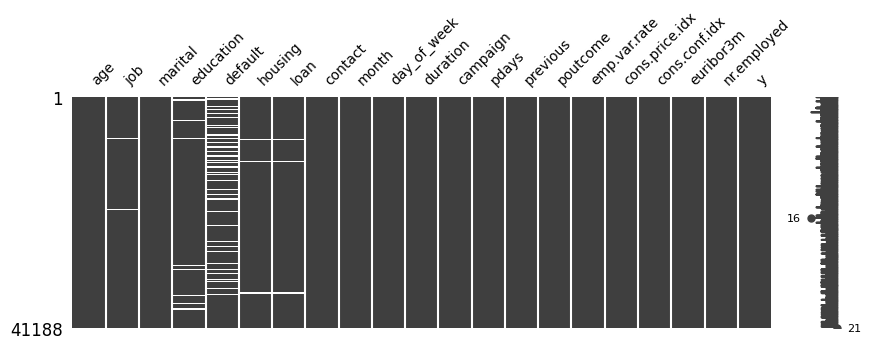

In [20]:
# identify missing data pattern using matrix plot
msn.matrix(df_missing, figsize=(10,3), fontsize=10)

From the matrix plot, we can see that columns such as job, marital, education, default, housing, and loan contain missing values, with the highest percentage in the default column, which is around 20%.

We will handle these missing values using an iterative imputer in the feature engineering section.

### **3.3. Identifying Outliers**

In this step, we will identify and handle outliers in our data.

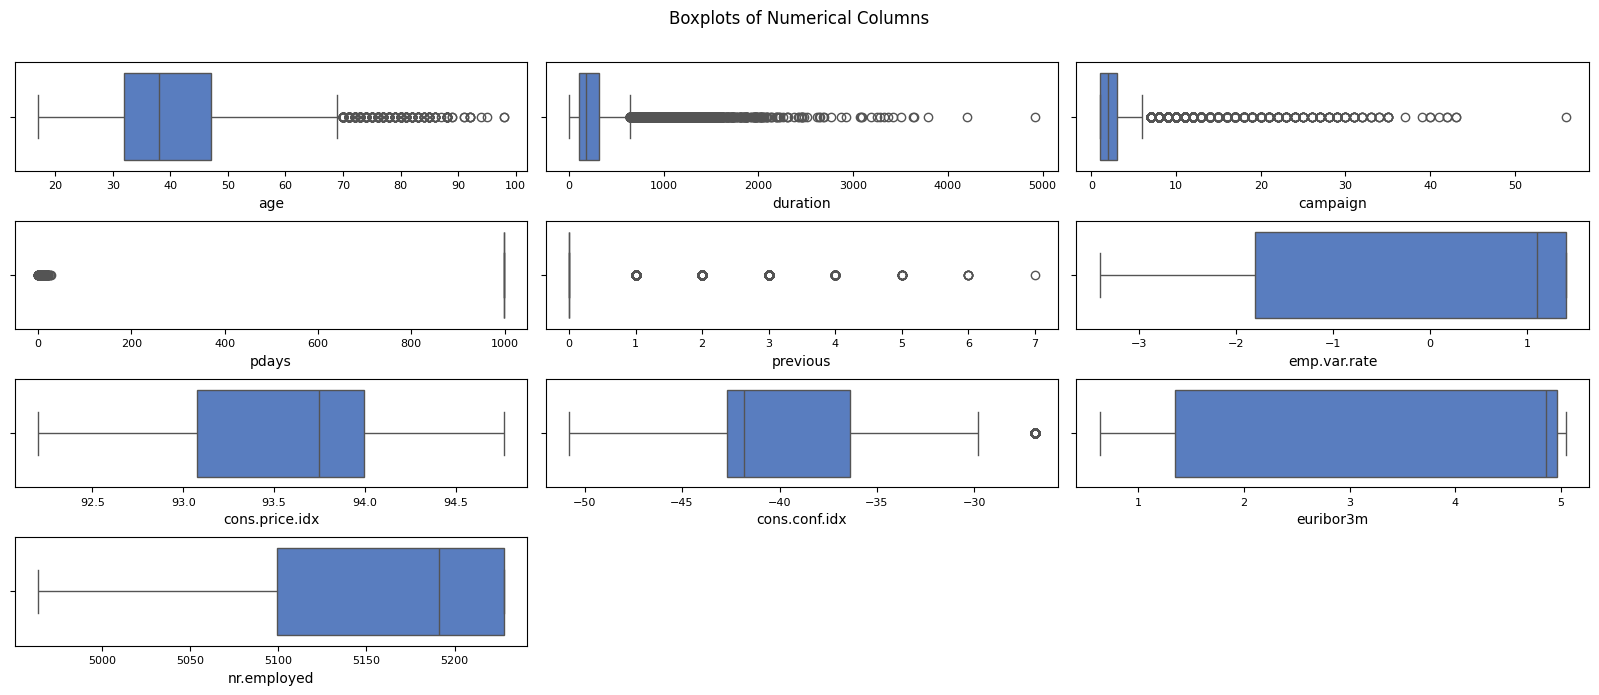

In [21]:
fig, axes = plt.subplots(4, 3, figsize=(16, 7))

plt.rcParams.update({'font.size': 7})

for i, column in enumerate(numerical_cols):
    row, col = divmod(i, 3)
    sns.boxplot(x=df[column], ax=axes[row, col], palette='muted')
    axes[row, col].tick_params(axis='x', labelsize=8)
    axes[row, col].set_xlabel(column, fontsize=10)
    axes[row, col].grid(False)

fig.delaxes(axes[3, 1]) # dont show target y
fig.delaxes(axes[3, 2])

fig.suptitle('Boxplots of Numerical Columns', fontsize=12)

fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Based on the image above, we can see that there are several features that have outliers, namely age, cons.conf.idx, previous, duration, pdays, and campaign.

In [22]:
def detect_outlier():
    columns = df.select_dtypes("number").columns
    result = []
    for column in columns:
        if column != "pdays":
            data = df
        else:
            data = df[df["pdays"] != 999]

        q1 = np.round(np.percentile(data[column], 25), 2)
        q3 = np.round(np.percentile(data[column], 75), 2)
        percentile95 = np.round(np.percentile(data[column], 97), 2)
        iqr = q3 - q1
        lower_bound = np.round(q1 - 1.5 * iqr, 2)
        upper_bound = np.round(q3 + 1.5 * iqr, 2)
        
        outliers = data[
            (data[column] < lower_bound) | (data[column] > upper_bound)
        ].shape[0]
        
        result.append(
            {
                "col": column,
                "Q1": q1,
                "Q3": q3,
                "IQR": iqr,
                "lower_bound": lower_bound,
                "upper_bound": upper_bound,
                "95%": percentile95,
                "outliers": outliers,
            }
        )
    return result


In [23]:
table_outlier = pd.DataFrame(detect_outlier()).set_index("col")
table_outlier

,Q1,Q3,IQR,lower_bound,upper_bound,95%,outliers
col,,,,,,,
age,32.00,47.00,15.00,9.50,69.50,59.00,469
duration,102.00,319.00,217.00,-223.50,644.50,911.00,2963
campaign,1.00,3.00,2.00,-2.00,6.00,9.00,2406
pdays,3.00,7.00,4.00,-3.00,13.00,15.00,82
previous,0.00,0.00,0.00,0.00,0.00,1.00,5625
emp.var.rate,-1.80,1.40,3.20,-6.60,6.20,1.40,0
cons.price.idx,93.08,93.99,0.91,91.72,95.35,94.46,0
cons.conf.idx,-42.70,-36.40,6.30,-52.15,-26.95,-31.40,447
euribor3m,1.34,4.96,3.62,-4.09,10.39,4.97,0


In [24]:
outliers_col = [id for id in table_outlier.index if (table_outlier.loc[id, "outliers"] > 0) & (id not in ["y", "duration"])]
outliers_col

['age', 'campaign', 'pdays', 'previous', 'cons.conf.idx']

From the table above, we observe that some columns contain outliers. While including outliers in our data might skew prediction results, they can also carry valuable information that we may miss if we eliminate them all.

In this case, we have decided to examine the outliers more closely to determine whether they are anomalous and should be removed.

We will assess the probability of success in the deposit term for the outliers. If this probability significantly deviates from the overall success probability of around 11%—either being at least twice as high (22% or more) or at least half as low (6% or less)—the outlier data may offer valuable insights into the target variable.

Let's review the visualizations and make a decision based on the results. If the probability of success for the outliers falls within these ranges, we should consider retaining them, as they may provide important information to enhance our understanding and predictions.

We will also skip the `duration` variable, as it will not be used in our machine learning model. We will explain its exclusion in a later step.

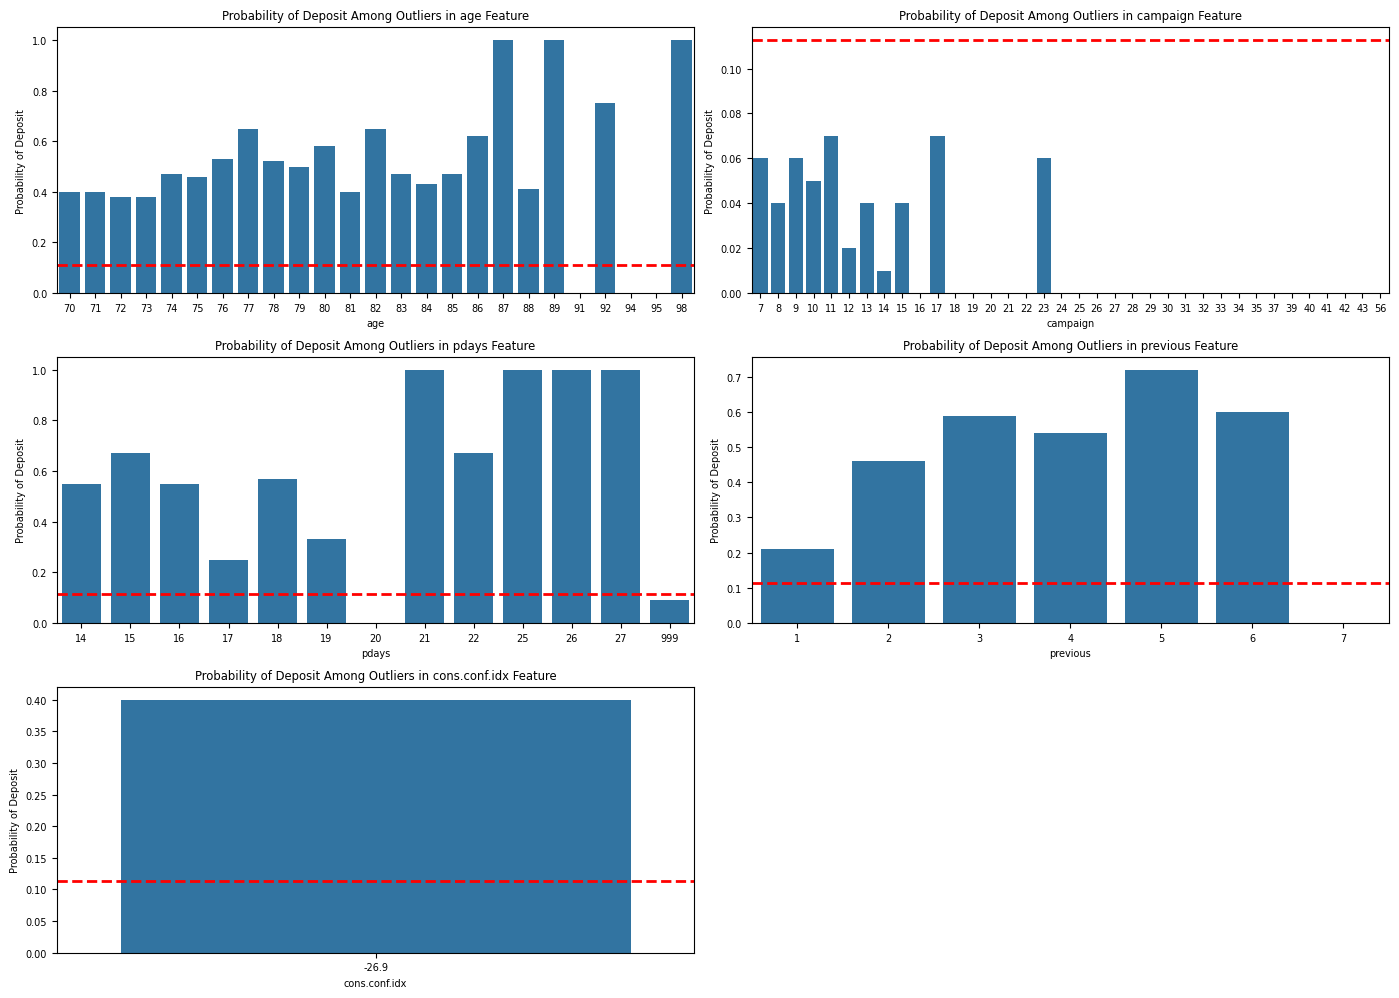

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))

axes = axes.flatten()

for i, col in enumerate(outliers_col):
    value_counts_deposit = df[
        (df[col] > table_outlier.loc[col, "upper_bound"]) & (df["y"] == 1)
    ][col].value_counts()
    value_counts = df[df[col] > table_outlier.loc[col, "upper_bound"]][
        col
    ].value_counts()
    percentage = (value_counts_deposit / value_counts).fillna(0).round(2)
    percentage_df = percentage.reset_index()
    percentage_df.columns = [col, "Probability"]

    sns.barplot(data=percentage_df, x=col, y="Probability", ax=axes[i])

    # Add a horizontal dotted line (adjust y=0.1127 if needed)
    axes[i].axhline(y=0.1127, color="red", linestyle="--", linewidth=2)

    # Set labels and title for each subplot
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Probability of Deposit")
    axes[i].set_title(f"Probability of Deposit Among Outliers in {col} Feature")

# Remove any empty subplots
if len(outliers_col) < len(axes):
    for j in range(len(outliers_col), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


The plot shows that outliers in deposit success probabilities differ significantly from the overall probability, meeting our criteria for retention. We have decided to keep all outliers, as they may provide valuable insights. We will handle them thoughtfully to maximize their contribution to our analysis.

## **4. Exploratory Data Analysis (EDA)**

In this section, we'll conduct a quick exploratory data analysis to identify the most influential predictors of customer deposit terms, which will later be examined in our machine learning model explanations.

### **4.1. General Data Overview**

Below  we'll look at distribution of data, data correlation and target distribution to get the gist of the data before we drill down each attribute.

#### **Numerical Attribute Distribution**

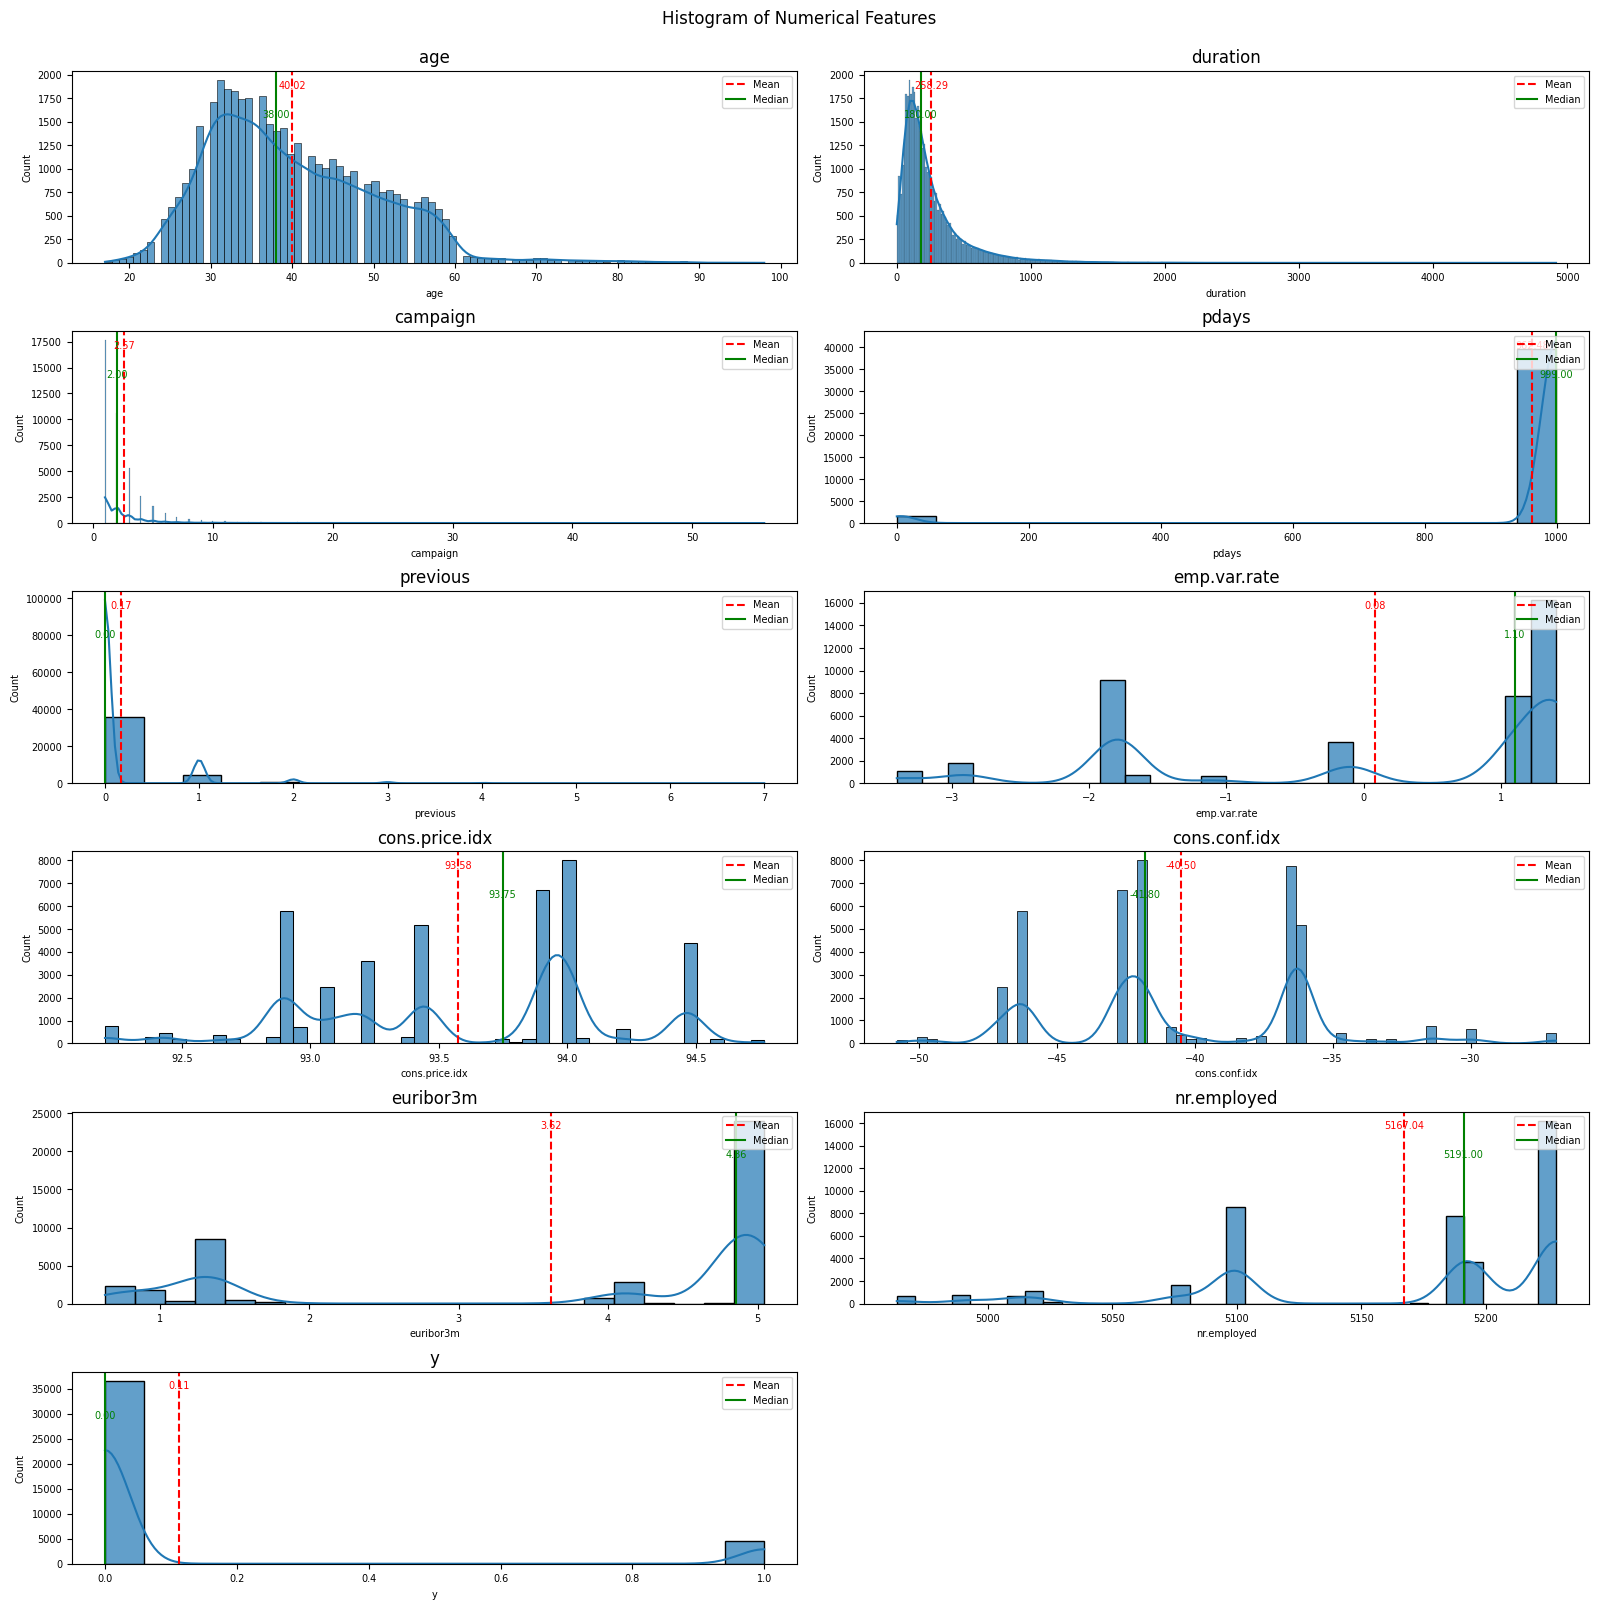

In [26]:
fig, axes = plt.subplots(6, 2, figsize=(16, 16), sharex=False)
axes = axes.flatten()

fig.suptitle("Histogram of Numerical Features", fontsize=12, y=1)

for i, column in enumerate(numerical_cols):
    ax = axes[i]

    # Plot histogram
    sns.histplot(df[column], kde=True, ax=ax, alpha=0.7)

    # Calculate and plot mean and median
    mean = df[column].mean()
    median = df[column].median()

    ax.axvline(mean, color="r", linestyle="--", label="Mean")
    ax.axvline(median, color="g", linestyle="-", label="Median")
    ax.legend(loc="upper right")

    # Set labels and titles
    ax.set_title(f"{column}", fontsize=12)
    ax.set_xlabel(column)
    ax.set_ylabel("Count")

    # Add text annotations for mean and median
    ax.text(
        mean,
        ax.get_ylim()[1] * 0.9,
        f"{mean:.2f}",
        horizontalalignment="center",
        verticalalignment="bottom",
        color="r",
    )
    ax.text(
        median,
        ax.get_ylim()[1] * 0.8,
        f"{median:.2f}",
        horizontalalignment="center",
        verticalalignment="top",
        color="g",
    )

if len(numerical_cols) < len(axes):
    for j in range(len(numerical_cols), len(axes)):
        fig.delaxes(axes[j])


fig.tight_layout()
plt.show()


Based on the graph above, the numerical information we can gather includes:

- All numerical data exhibit non-normal distribution patterns.
- The age distribution of customers is primarily concentrated between 20 and 60 years old.
- The median duration of contacts is approximately 180 seconds, with most durations falling within the range of 0 to 800 seconds.
- During the current campaign, most customers were contacted between 1 and 3 times.
- The majority of customers were not contacted in previous marketing programs.
- The consumer price index during this period indicates a reduction in household consumption goods prices between 5% and 8%.
- The Euribor 3-month rate shows a bimodal distribution, with distinct clusters below 2 and above 3.5. The majority of contacts occurred when the Euribor rate was above 3.5.
- The number of employees also displays a bimodal distribution, with one group above 5150 and another below 5150.

#### **Categorical Attribute Distribution**

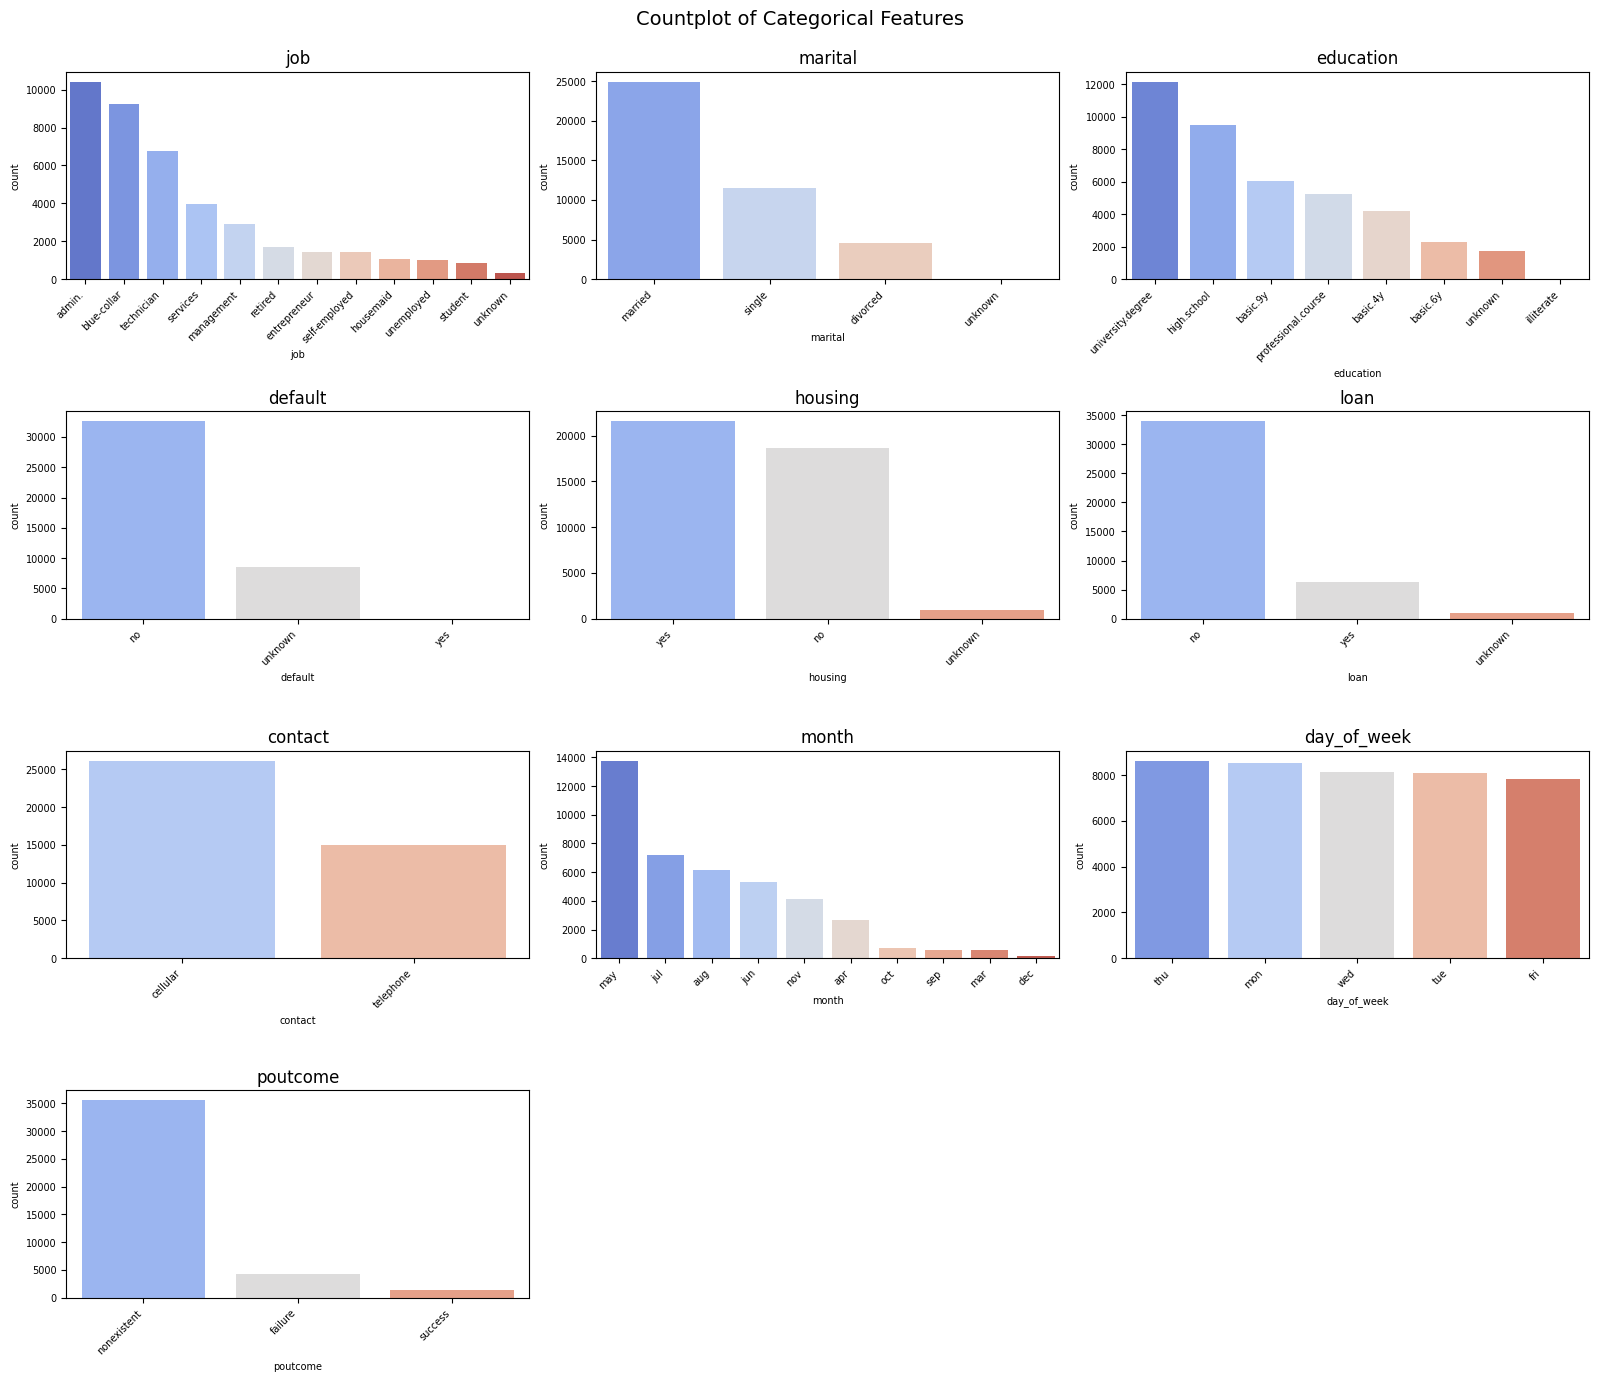

In [27]:
fig, axes = plt.subplots(4, 3, figsize=(16, 14))

axes = axes.flatten()

for col, ax in zip(categorical_cols, axes):
    sns.countplot(data=df, x=col, ax=ax, order=df[col].value_counts().index, palette='coolwarm')
    ax.set_title(f'{col}', size=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for ax in axes[len(categorical_cols):]:
    ax.axis('off')

fig.suptitle('Countplot of Categorical Features', fontsize=14)

fig.tight_layout(rect=[0, 0, 1, 0.98])
fig.show()

#### **Correlation of Numerical Attributes**

In [28]:
df_corr = df.copy()

corr = df_corr[numerical_cols].corr('spearman')
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.002123,0.005715,-0.001062,-0.012643,0.045003,0.044790,0.114536,0.054391,0.044789,-0.011861
duration,-0.002123,1.000000,-0.080953,-0.083072,0.042407,-0.069201,0.002854,-0.008678,-0.078346,-0.095225,0.348777
campaign,0.005715,-0.080953,1.000000,0.055514,-0.087420,0.156360,0.096494,-0.001554,0.140512,0.144264,-0.063668
pdays,-0.001062,-0.083072,0.055514,1.000000,-0.509583,0.227698,0.056763,-0.077265,0.278488,0.290673,-0.324942
previous,-0.012643,0.042407,-0.087420,-0.509583,1.000000,-0.435293,-0.282720,-0.115967,-0.454724,-0.438721,0.200914
emp.var.rate,0.045003,-0.069201,0.156360,0.227698,-0.435293,1.000000,0.664890,0.224693,0.939915,0.944702,-0.247480
cons.price.idx,0.044790,0.002854,0.096494,0.056763,-0.282720,0.664890,1.000000,0.245633,0.490970,0.464738,-0.122187
cons.conf.idx,0.114536,-0.008678,-0.001554,-0.077265,-0.115967,0.224693,0.245633,1.000000,0.236646,0.132707,0.041229
euribor3m,0.054391,-0.078346,0.140512,0.278488,-0.454724,0.939915,0.490970,0.236646,1.000000,0.928857,-0.266822
nr.employed,0.044789,-0.095225,0.144264,0.290673,-0.438721,0.944702,0.464738,0.132707,0.928857,1.000000,-0.283957


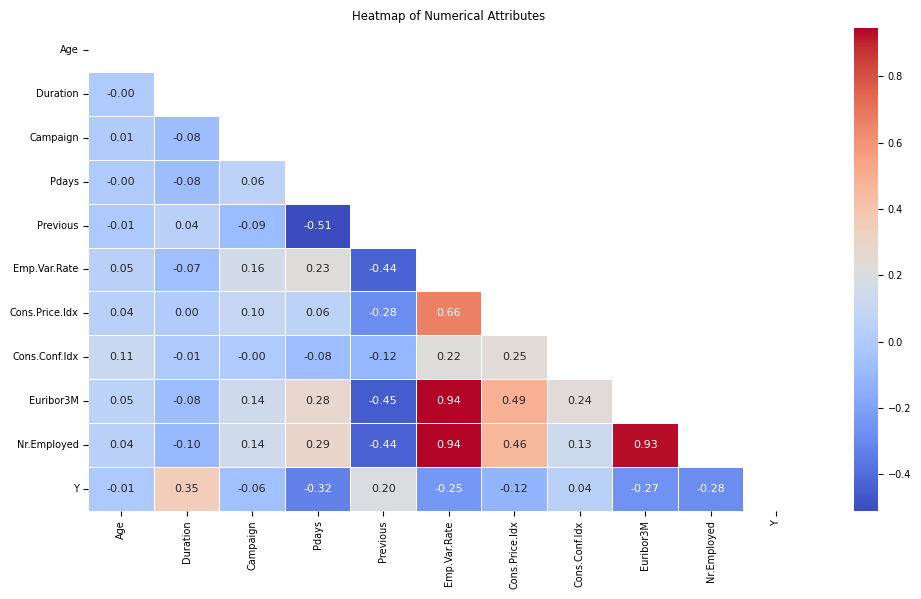

In [29]:
plt.figure(figsize=(10, 6))

mask = np.triu(np.ones_like(corr, dtype=bool))
labels = [col.replace("_", " ").title() for col in corr.columns]

sns.heatmap(
    corr, 
    annot=True,
    annot_kws={'size': 8},
    xticklabels=labels,
    yticklabels=labels,
    mask=mask,
    fmt='.2f', 
    linewidths=.5,
    cbar=True,
    cmap='coolwarm'
)

plt.title('Heatmap of Numerical Attributes')
plt.tight_layout()
plt.show()

From the correlation matrix, we can observe strong positive correlations among several socio-economic features. These include `emp.var.rate`, `cons.price.idx`, `euribor3m`, and `nr.employed`.

The target variable shows a moderate positive correlation with the `duration` feature. This correlation likely stems from the assumption that all customers who weren't called (duration=0) didn't make a deposit (target=no).


Weak negative correlations exist between the target and features such as `pdays`, `emp.var.rate`, `euribor3m`, and `nr.employed`. Additionally, there's a weak positive correlation between the target and the `previous` feature.

Now we are going to explore the data with visualization and find out :
- What is the deposit distribution ("yes" compared with "no")
- Who has the highest probabilities of accepting deposit given certain charateristics?

#### **Label Distribution**

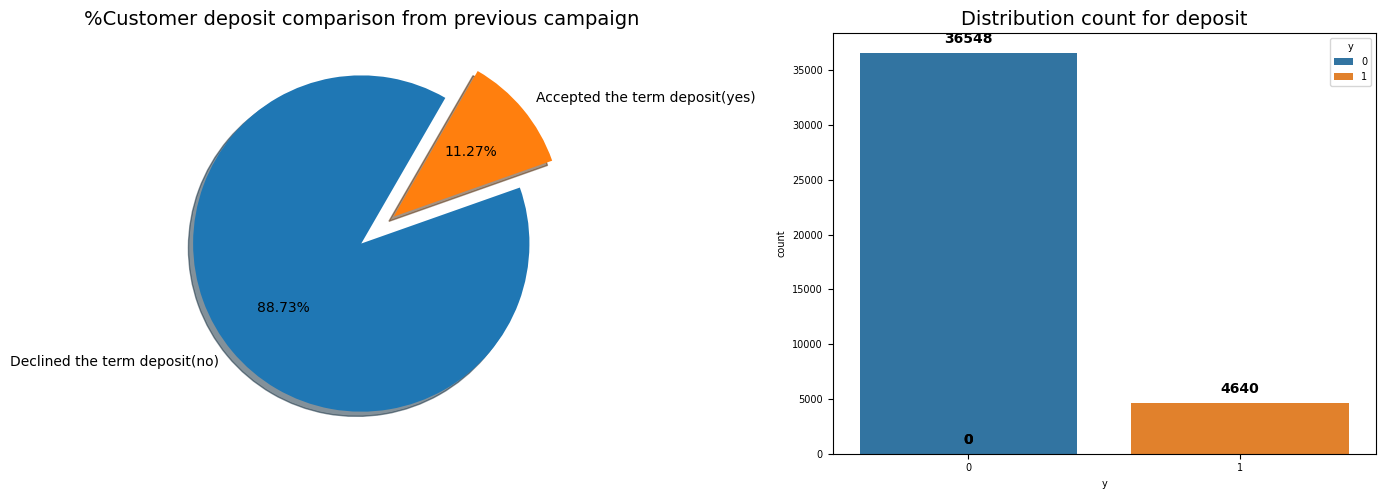

In [30]:
f, ax = plt.subplots(1, 2, figsize=(14, 5))
labels = "Declined the term deposit(no)", "Accepted the term deposit(yes)"

df["y"].value_counts().plot.pie(
    explode=[0, 0.25],
    autopct="%1.2f%%",
    shadow=True,
    labels=labels,
    fontsize=10,
    startangle=60,
    ax=ax[0],
)
ax[0].set_title("%Customer deposit comparison from previous campaign", fontsize=14)
ax[0].set_ylabel("")

# plotting count distribution
s = sns.barplot(
    df["y"].value_counts().reset_index(), ax=ax[1], x="y", hue="y", y="count"
)

# giving labels to each bar
for p in s.patches:
    s.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
        fontsize=10,
        color="black",
        fontweight="bold",
    )

ax[1].set_title("Distribution count for deposit", fontsize=14)

plt.tight_layout()


There is approximately 1:9 ratio of those who decided to accept the term deposit to those who declined.

### **4.2. Analysis of Numerical Features**

In this section, we will try to find patterns in each numerical feature of users and whether they accept the deposit term or not.

#### **Age with Deposit Subscription**

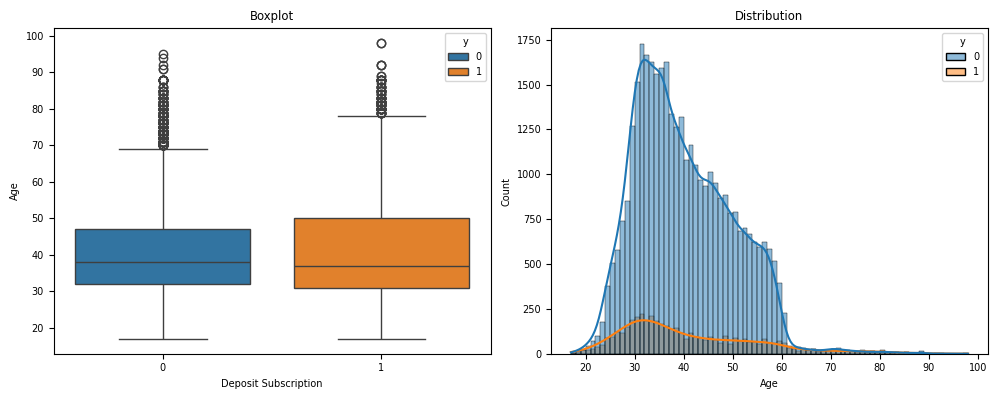

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=df, y='age', x='y', hue='y', ax=axes[0])
axes[0].set_title('Boxplot')
axes[0].set_xlabel('Deposit Subscription')
axes[0].set_ylabel('Age')

sns.histplot(data=df, x='age', hue='y', binwidth=1, kde=True, ax=axes[1])
axes[1].set_title('Distribution')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [32]:
# Add binning to for simple age segmentation
def age_group(x):
    if x < 30:
        age_group = "<30"
    elif x < 45:
        age_group = "30-45"
    elif x < 60:
        age_group = "45-60"
    else:
        age_group = ">60"
    return age_group

df_temp = df.copy()
df_temp['age_group'] = df_temp['age'].apply(age_group)

<Axes: xlabel='age_group', ylabel='count'>

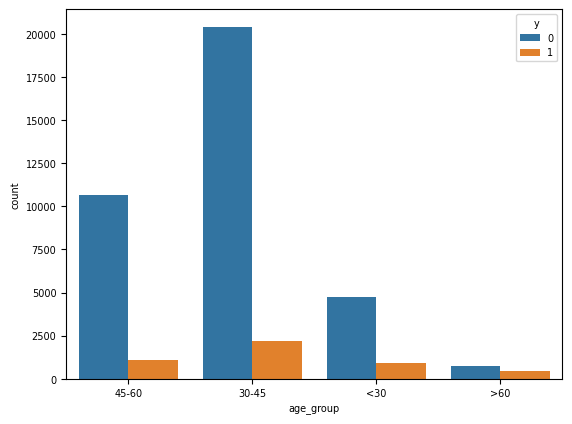

In [33]:
sns.countplot(x='age_group', data=df_temp, hue='y')

In [34]:
group_age = df_temp.groupby(["age_group", "y"]).size().unstack(fill_value=0)
group_age.columns = [f"y={col}" for col in group_age.columns]

group_age["Total"] = group_age.sum(axis=1)
group_age["y=0 (%)"] = round(
    (group_age["y=0"] / group_age["Total"]) * 100
)
group_age["y=1 (%)"] = round(
    (group_age["y=1"] / group_age["Total"]) * 100
)

print(group_age)

             y=0   y=1  Total  y=0 (%)  y=1 (%)
age_group                                      
30-45      20417  2168  22585     90.0     10.0
45-60      10663  1078  11741     91.0      9.0
<30         4747   922   5669     84.0     16.0
>60          721   472   1193     60.0     40.0


Here we can see that the 30-45 age group comprises the largest number of customers, but only 10% convert. In contrast, the elderly group (ages >60) represents a smaller number of customers but has a higher conversion rate of 40%.

#### **Contact Duration with Deposit Subscription**

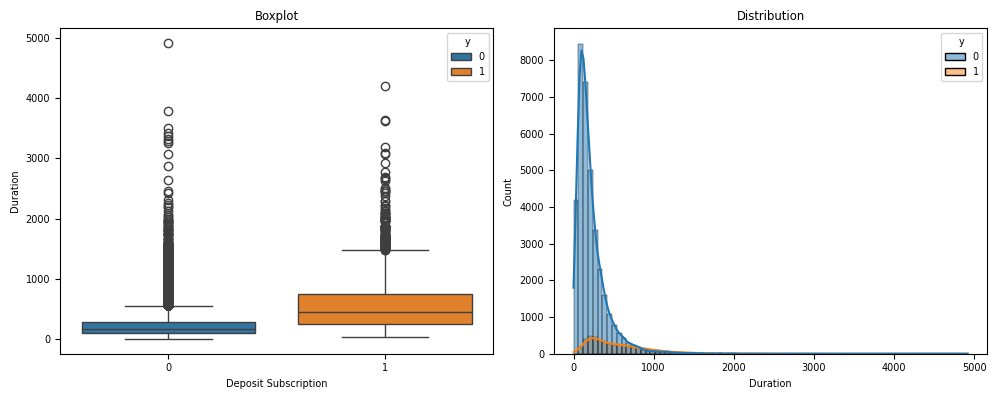

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=df, y='duration', x='y', hue='y', ax=axes[0])
axes[0].set_title('Boxplot')
axes[0].set_xlabel('Deposit Subscription')
axes[0].set_ylabel('Duration')

sns.histplot(data=df, x='duration', hue='y', binwidth=60, common_norm=False, kde=True, ax=axes[1])
axes[1].set_title('Distribution')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

From the boxplot and histogram above, we can see that a longer call duration is associated with a higher likelihood of customer deposits.

#### **Number of Campaign with the Deposit Subscription**
Campaign = Contacts Performed during this Campaign

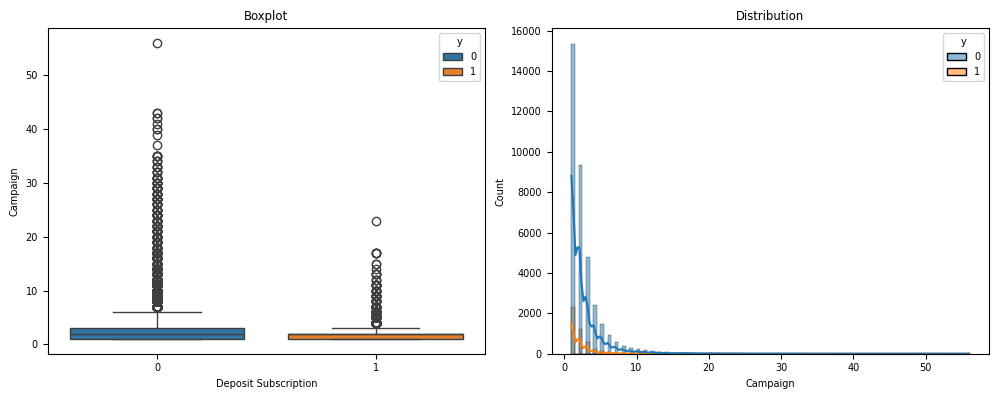

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=df, y='campaign', x='y', hue='y', ax=axes[0])
axes[0].set_title('Boxplot')
axes[0].set_xlabel('Deposit Subscription')
axes[0].set_ylabel('Campaign')

sns.histplot(data=df, x='campaign', hue='y', binwidth=0.5, common_norm=False, kde=True, ax=axes[1])
axes[1].set_title('Distribution')
axes[1].set_xlabel('Campaign')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

The boxplot on the left shows overlapping distributions, with distribution of no deposit have wide range compared with those who deposit this also shown in histogram on the right.
This suggesting that attribute `campaign` may not be a reliable predictor of customer subscription behavior.

#### **Number of Pdays and Deposit Subscription**
Pdays = days since the client was last contacted in a previous campaign

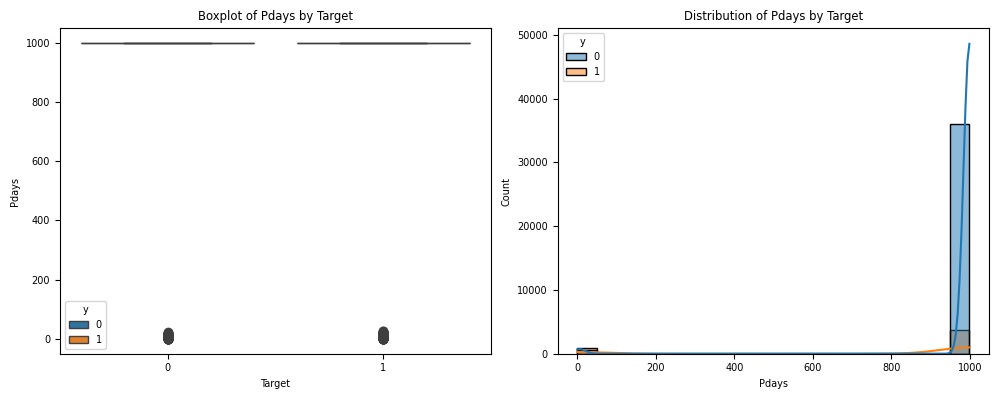

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=df, y='pdays', x='y', hue='y', ax=axes[0])
axes[0].set_title('Boxplot of Pdays by Target')
axes[0].set_xlabel('Target')
axes[0].set_ylabel('Pdays')

sns.histplot(data=df, x='pdays', hue='y', binwidth=50, stat='count', common_norm=False, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Pdays by Target')
axes[1].set_xlabel('Pdays')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

From the boxplot and histogram above, we can see that the distribution is heavily left-skewed, with data either at the rightmost extreme (pdays=999) or on the left (0 ≤ pdays ≤ 27).

This overlapping distribution also suggests that the attribute `pdays` may not be a reliable predictor of customer subscription behavior.


#### **Number of Previous with Deposit Subscription**
Previous = Number of contacts performed before this campaign for this client

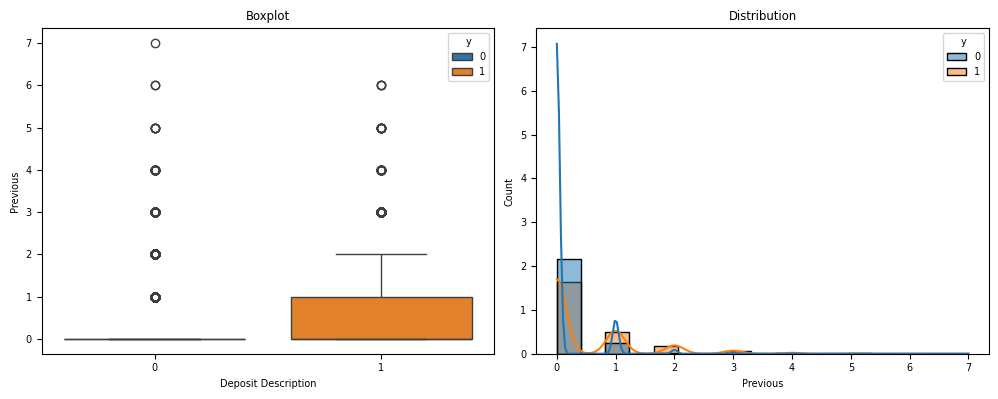

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=df, y='previous', x='y', hue='y', ax=axes[0])
axes[0].set_title('Boxplot')
axes[0].set_xlabel('Deposit Description')
axes[0].set_ylabel('Previous')

sns.histplot(data=df, x='previous', hue='y', stat='density', common_norm=False, kde=True, ax=axes[1])
axes[1].set_title('Distribution')
axes[1].set_xlabel('Previous')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [39]:
group_previous = df.groupby(["previous", "y"]).size().unstack(fill_value=0)
group_previous.columns = [f"y={col}" for col in group_previous.columns]

group_previous["Total"] = group_previous.sum(axis=1)
group_previous["y=0 (%)"] = round(
    (group_previous["y=0"] / group_previous["Total"]) * 100
)
group_previous["y=1 (%)"] = round(
    (group_previous["y=1"] / group_previous["Total"]) * 100
)

print(group_previous)


            y=0   y=1  Total  y=0 (%)  y=1 (%)
previous                                      
0         32422  3141  35563     91.0      9.0
1          3594   967   4561     79.0     21.0
2           404   350    754     54.0     46.0
3            88   128    216     41.0     59.0
4            32    38     70     46.0     54.0
5             5    13     18     28.0     72.0
6             2     3      5     40.0     60.0
7             1     0      1    100.0      0.0


From the observed data, although the number of customers contacted more than once decreases, there is a trend showing that customers contacted multiple times are more likely to make a deposit as the number of contacts increases. This indicates that the telemarketing strategy is relatively effective, as it reduces the number of calls made while successfully convincing targeted customers to subscribe.

#### **Employment Variation Rate with the Deposit Subscription**

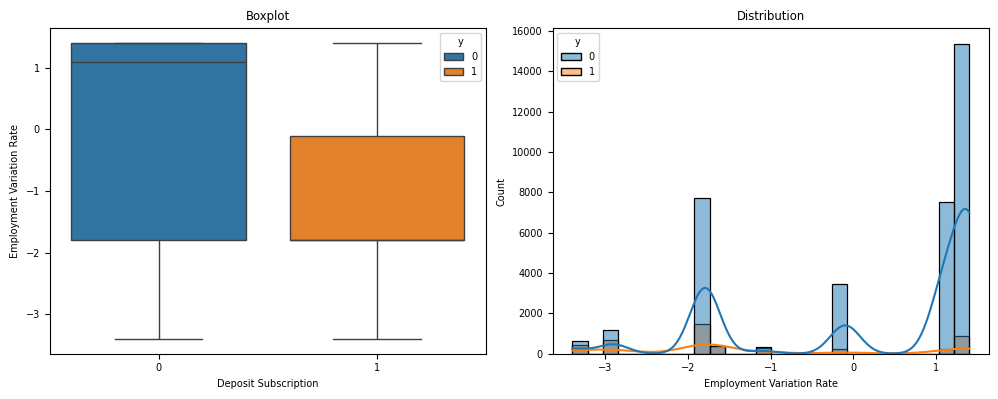

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=df, y='emp.var.rate', x='y', hue='y', ax=axes[0])
axes[0].set_title('Boxplot')
axes[0].set_xlabel('Deposit Subscription')
axes[0].set_ylabel('Employment Variation Rate')

sns.histplot(data=df, x='emp.var.rate', hue='y', stat='count', common_norm=False, kde=True, ax=axes[1])
axes[1].set_title('Distribution')
axes[1].set_xlabel('Employment Variation Rate')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

For the The median being near the top of the box and the box extending to the top whisker indicates that the upper range of the data is well-represented, but the central tendency is skewed toward the higher end.

In [41]:
group_emp_var_rate = df.groupby(["emp.var.rate", "y"]).size().unstack()
group_emp_var_rate.columns = [f"y={col}" for col in group_emp_var_rate.columns]

group_emp_var_rate["Total"] = group_emp_var_rate.sum(axis=1)
group_emp_var_rate["y=0 (%)"] = round(
    (group_emp_var_rate["y=0"] / group_emp_var_rate["Total"]) * 100
)
group_emp_var_rate["y=1 (%)"] = round(
    (group_emp_var_rate["y=0"] / group_emp_var_rate["Total"]) * 100
)

print(group_emp_var_rate)


                y=0   y=1  Total  y=0 (%)  y=1 (%)
emp.var.rate                                      
-3.4            617   454   1071     58.0     58.0
-3.0             84    88    172     49.0     49.0
-2.9           1069   594   1663     64.0     64.0
-1.8           7723  1461   9184     84.0     84.0
-1.7            370   403    773     48.0     48.0
-1.1            334   301    635     53.0     53.0
-0.2              9     1     10     90.0     90.0
-0.1           3451   232   3683     94.0     94.0
 1.1           7523   240   7763     97.0     97.0
 1.4          15368   866  16234     95.0     95.0


From the observed data, there is a trend where the number of customers deciding to subscribe decreases as the Employment Variation Rate (EVR) approaches a positive index. In contrast, the proportion of customers making a deposit remains relatively stable at around 36-52% when the EVR is negative, ranging from -1.1 to -3.4, except at an index of -1.8, where the proportion drops to just 16%. 

The decrease in the number of customers deciding to subscribe as the EVR approaches a positive value suggests that an improving labor market (indicated by a positive EVR) might be associated with increased job stability and possibly higher incomes, leading individuals to be less inclined to make additional financial commitments or subscriptions.

#### **Consumer Price Index with the Deposit Subscription**

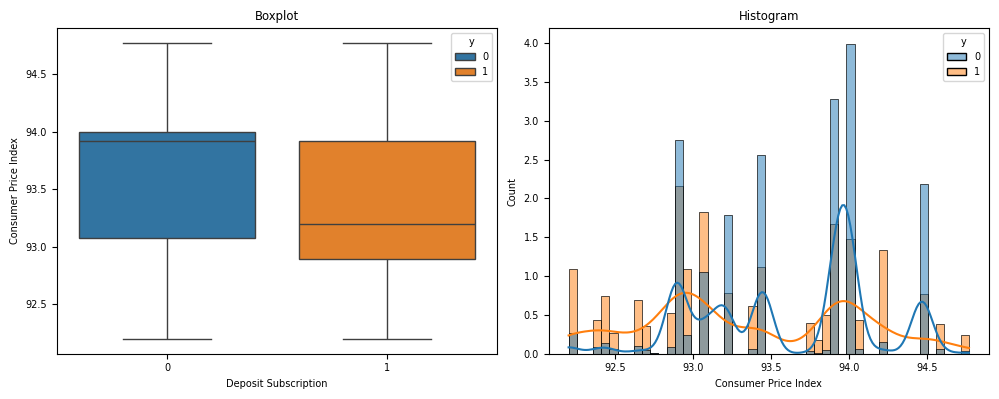

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=df, y='cons.price.idx', x='y', hue='y', ax=axes[0])
axes[0].set_title('Boxplot')
axes[0].set_xlabel('Deposit Subscription')
axes[0].set_ylabel('Consumer Price Index')

sns.histplot(data=df, x='cons.price.idx', hue='y', stat='density', common_norm=False, kde=True, ax=axes[1])
axes[1].set_title('Histogram')
axes[1].set_xlabel('Consumer Price Index')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [43]:
df['cons.price.idx'].describe()[['min', 'max']]

min    92.201
max    94.767
Name: cons.price.idx, dtype: float64

From the given dataset, the Consumer Price Index (CPI) remains relatively stable, ranging from 92.2 to 94.7. The boxplot on the left shows overlapping distributions, suggesting that CPI may not be a reliable predictor of customer subscription behavior. Meanwhile, the histogram on the right displays fluctuating figures for each class across consecutive indices, without revealing any distinct pattern.

#### **Consumer Confidence Index with the Deposit Subscription**

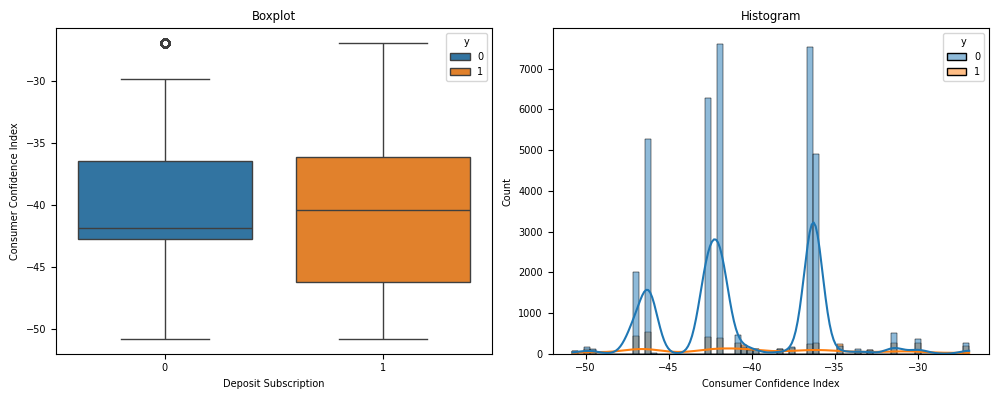

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=df, y='cons.conf.idx', x='y', hue='y', ax=axes[0])
axes[0].set_title('Boxplot')
axes[0].set_xlabel('Deposit Subscription')
axes[0].set_ylabel('Consumer Confidence Index')

sns.histplot(data=df, x='cons.conf.idx', hue='y', stat='count', common_norm=False, kde=True, ax=axes[1])
axes[1].set_title('Histogram')
axes[1].set_xlabel('Consumer Confidence Index')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [45]:
df['cons.conf.idx'].describe()[['min', 'max']]

min   -50.8
max   -26.9
Name: cons.conf.idx, dtype: float64

Given that the Customer Confidence Index (CCI) is negative, ranging from -26.9 to -50.8, it suggests that customers are generally pessimistic about economic conditions at the time the data was collected. 

Notably, the highest number of non-subscribing customers is observed within the range of -41 to -47. However, based on these figures, it cannot be concluded that the CCI has a high impact on subscription behavior in this observation.


#### **Euribor 3M with the Deposit Subscription**

euribor3m (The 3-month Euro Interbank Offered Rate) is a key interest rate in the Eurozone financial markets. It represents the average interest rate at which major European banks are willing to lend to one another unsecured funds in euros for a period of three months. 

Changes in the euribor3m can influence the broader economy. For example, if the rate increases, borrowing costs for businesses and consumers may rise, potentially slowing down economic activity. Conversely, a lower euribor3m rate can stimulate economic growth by making borrowing cheaper.

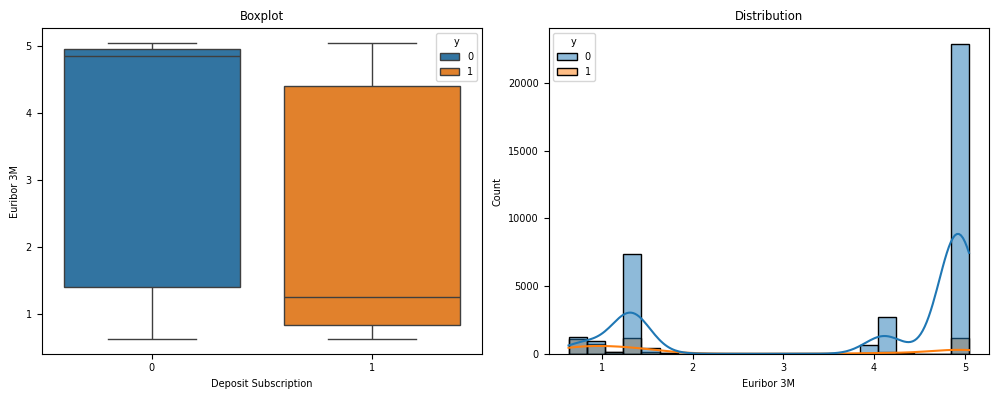

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=df, y='euribor3m', x='y', hue='y', ax=axes[0])
axes[0].set_title('Boxplot')
axes[0].set_xlabel('Deposit Subscription')
axes[0].set_ylabel('Euribor 3M')

sns.histplot(data=df, x='euribor3m', hue='y', kde=True, ax=axes[1])
axes[1].set_title('Distribution')
axes[1].set_xlabel('Euribor 3M')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [47]:
print("Median of deposit=no:", df['euribor3m'][df['y'] == 0].median())
print("Median of deposit=yes:", df['euribor3m'][df['y'] == 1].median())


Median of deposit=no: 4.857
Median of deposit=yes: 1.266


Based on the visualizations above of Euribor3m rates, we observe notable differences between depositors and non-depositors. The median rate for non-depositors (4.857) is significantly higher than for depositors (1.266), with data concentrations in the rates between 1-2 and 4-5.

The distribution is left-skewed for non-depositors and right-skewed for depositors. However, despite these distinctions, no clear pattern emerges that definitively links Euribor3m rates to deposit behavior. Therefore, while this attribute reveals interesting differences between the two groups, it may not serve as a reliable standalone indicator for predicting deposit decisions.

#### **Number of Employees with the Deposit Subscription**

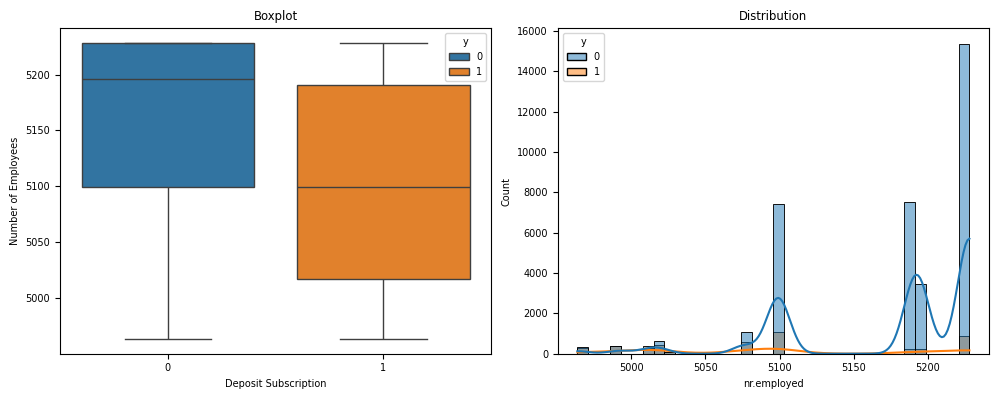

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=df, y='nr.employed', x='y', hue='y', ax=axes[0])
axes[0].set_title('Boxplot')
axes[0].set_xlabel('Deposit Subscription')
axes[0].set_ylabel('Number of Employees')

sns.histplot(data=df, x='nr.employed', hue='y', kde=True, ax=axes[1])
axes[1].set_title('Distribution')
axes[1].set_xlabel('nr.employed')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

From the box plot, we can see that the distributions of subscribers and non-subscribers are overlapping, but there's a distinct pattern where non-subscriber data are more concentrated in the mid to upper range (5100-5200), while subscribers have a more even distribution across any number of employees.

**Summary**:


---

### **4.3. Analysis of Categorical Features: Focus on Subscribing Customers**

In [49]:
# dataframe for only customer who accept deposit term
df_yes = df[df["y"]==1]

#### **% Acceptance by Job**

In [50]:
# Job count for accepted deposits
job_deposit1 = (
    df_yes["job"].value_counts().reset_index().rename({"count": "CountDeposit"}, axis=1)
)

job_deposit1


,job,CountDeposit
0,admin.,1352
1,technician,730
2,blue-collar,638
3,retired,434
4,management,328
5,services,323
6,student,275
7,self-employed,149
8,unemployed,144
9,entrepreneur,124


In [51]:
# calculating conversion rate of each job
job_deposit = df["job"].value_counts().reset_index()
job_deposit["%JobCount"] = job_deposit["count"] / len(df) * 100
job_convert = pd.merge(job_deposit, job_deposit1, how="inner", on="job")
job_convert["%Conversion"] = job_convert["CountDeposit"] / job_convert["count"] * 100
job_convert = job_convert.sort_values(by="%Conversion", ascending=False)
job_convert


,job,count,%JobCount,CountDeposit,%Conversion
10,student,875,2.124405,275,31.428571
5,retired,1720,4.175974,434,25.232558
9,unemployed,1014,2.461882,144,14.201183
0,admin.,10422,25.303486,1352,12.972558
4,management,2924,7.099155,328,11.217510
11,unknown,330,0.801204,37,11.212121
2,technician,6743,16.371273,730,10.826042
7,self-employed,1421,3.450034,149,10.485574
8,housemaid,1060,2.573565,106,10.000000
6,entrepreneur,1456,3.535010,124,8.516484


In [52]:
# set custom colors for graph theme:
custom_colors = [
    "#4878a8", "#e19c24", "#6f9e64", "#d84b40", "#835b97",
    "#a76e59", "#de8b9c", "#797979", "#b4b479", "#4b92a8",
    "#a1c7c2", "#e8d1b9", "#ffda66",
]

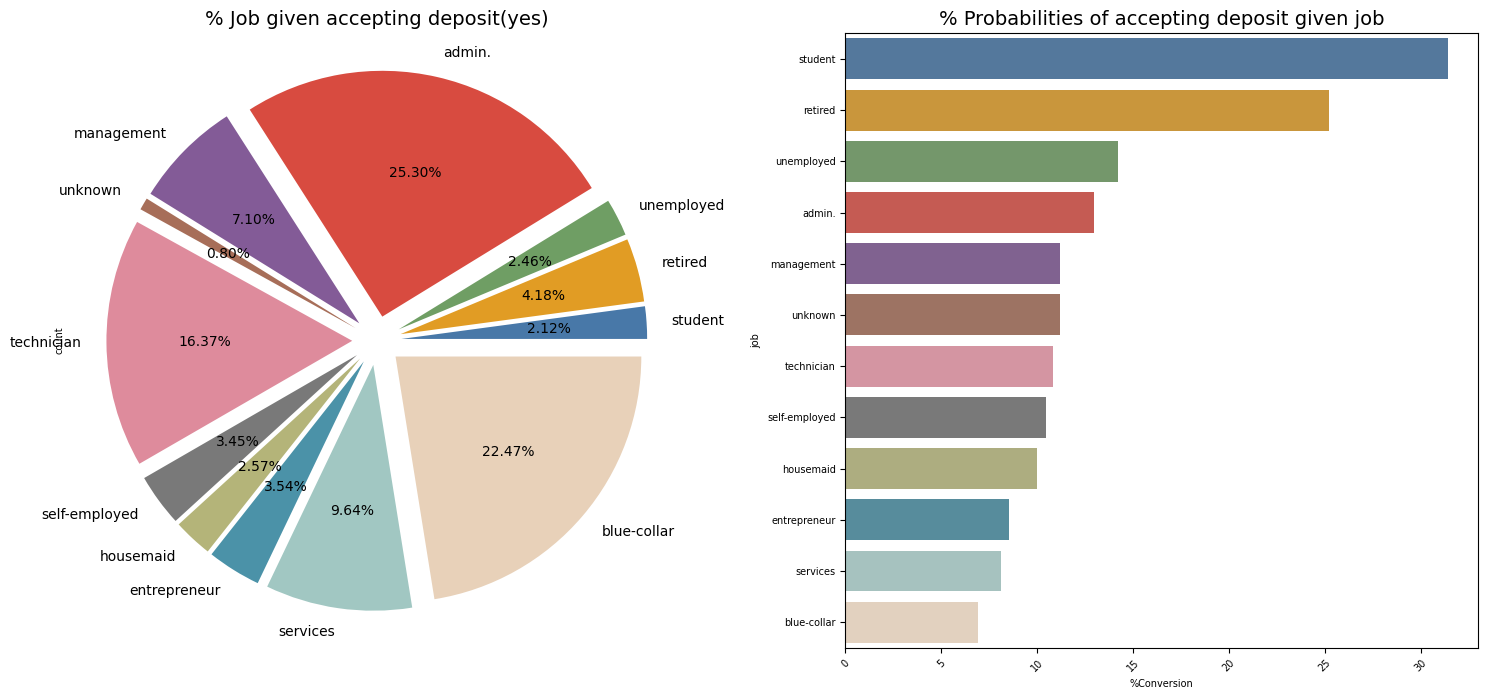

In [53]:
color_mapping = dict(zip(job_convert["job"], custom_colors))

f, ax = plt.subplots(1, 2, figsize=(15, 7))

# pie chart for % Job and Education given accepting deposit
job_convert["count"].plot.pie(
    explode=[0.1] * len(job_convert),
    autopct="%1.2f%%",
    fontsize=10,
    ax=ax[0],
    labels=job_convert["job"],
    startangle=0,
    colors=custom_colors,
)
ax[0].set_title("% Job given accepting deposit(yes)", fontsize=14)


# barplot for % Probabilities of accepting deposit given job and education
sns.barplot(
    job_convert,
    x="%Conversion",
    y="job",
    hue="job",
    legend=False,
    ax=ax[1],
    palette=[color_mapping[x] for x in job_convert["job"]],
)
plt.xticks(rotation=45)
ax[1].set_title("% Probabilities of accepting deposit given job", fontsize=14)

plt.tight_layout()
plt.show()


From the charts above , we can conclude that :
- Even though student only makes up to 2% of the total population in accept group, it has the highest probability (31%) of accepting deposit offer. This group may have parental support or good financial habits.
- While admin makes up to 25% of the total population in accept group, it has only 12.9% chance of accepting deposit offer.
- Blue-collar jobs have the least probability of accepting deposit offer despite it making up second highest proportion in the accept group. This might suggest that this group have low disposable income and/or prefer other savings method

**Conclusion** : according to the findings, students have the highest conversion rate and it is recommended to prioritize them.

--- 

#### **% Acceptance by Education**

In [54]:
# education count given accepted deposit
education_deposit1 = (
    df_yes["education"]
    .value_counts()
    .reset_index()
    .rename({"count": "CountDeposit"}, axis=1)
)
education_deposit1


,education,CountDeposit
0,university.degree,1670
1,high.school,1031
2,professional.course,595
3,basic.9y,473
4,basic.4y,428
5,unknown,251
6,basic.6y,188
7,illiterate,4


In [55]:
# calculating education conversion rate
education_deposit = df["education"].value_counts().reset_index()
education_deposit["%EducationCount"] = education_deposit["count"] / len(df) * 100
education_convert = pd.merge(
    education_deposit, education_deposit1, how="inner", on="education"
)
education_convert["%Conversion"] = (
    education_convert["CountDeposit"] / education_convert["count"] * 100
)
education_convert = education_convert.sort_values(by="%Conversion", ascending=False)
education_convert


,education,count,%EducationCount,CountDeposit,%Conversion
7,illiterate,18,0.043702,4,22.222222
6,unknown,1731,4.202680,251,14.500289
0,university.degree,12168,29.542585,1670,13.724523
3,professional.course,5243,12.729436,595,11.348465
1,high.school,9515,23.101389,1031,10.835523
4,basic.4y,4176,10.138875,428,10.249042
5,basic.6y,2292,5.564728,188,8.202443
2,basic.9y,6045,14.676605,473,7.824648


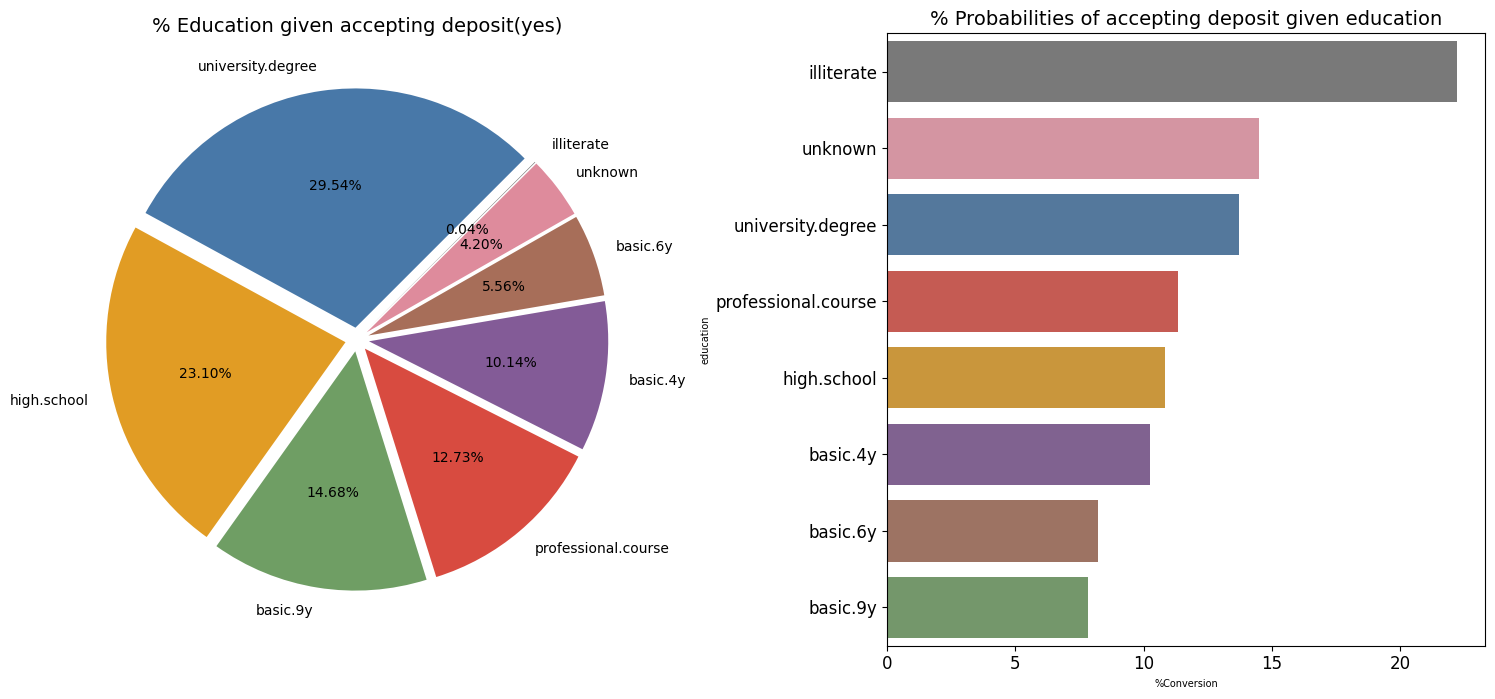

In [56]:
color_mapping = dict(zip(education_deposit["education"], custom_colors))

f, ax = plt.subplots(1, 2, figsize=(15, 7))

# pie chart for % Education given accepting deposit
education_deposit["count"].plot.pie(
    explode=[0.05] * len(education_deposit),
    autopct="%1.2f%%",
    fontsize=10,
    ax=ax[0],
    labels=education_deposit["education"],
    startangle=45,
    colors=custom_colors,
)
ax[0].set_title("% Education given accepting deposit(yes)", fontsize=14)
ax[0].set_ylabel("")

# barplot for % Probabilities of accepting deposit given education
sns.barplot(
    education_convert,
    x="%Conversion",
    y="education",
    hue="education",
    legend=False,
    ax=ax[1],
    palette=[color_mapping[x] for x in education_convert["education"]],
)

ax[1].set_title("% Probabilities of accepting deposit given education", fontsize=14)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)


plt.tight_layout()
plt.show()


From the charts above, we see that :
- Illiterate people have the highest probabilities of accepting the deposit offer (22%). This might because of their limited investment options or prefer safer investment options.
- University degree makes up the highest proportion (29.54%) and has decent chance of accepting the offer (13%)
- basic 6y and basic 9y have the least probabilities of accepting the offer. This might suggest that these group are still unaware of investment importance.

**Conclusion** : While it is a very rare occurance, illiterate people have the highest conversion rate.

--- 

#### **% Conversion by Job and Education**

Now we are going to pair the combinations of top 4 job and education to see if there is any interesting percentage. We are going to ignore pairings that do not exist

In [57]:

# Define job and education categories
jobs = ["student", "retired", "unemployed", "admin."]
educations = ["illiterate", "unknown", "university.degree", "professional.course"]

# Create a list to store the results
data = []

# Calculate counts and conversion rates
for job in jobs:
    for edu in educations:
        total_count = len(df[(df["job"] == job) & (df["education"] == edu)])
        deposit_count = len(df_yes[(df_yes["job"] == job) & (df_yes["education"] == edu)])
        group_percentage = total_count / len(df) * 100
        
        if total_count > 0:  # Exclude pairs with zero total_count
            data.append({
                "group(job&education)": f"{job}, {edu}",
                "count": total_count,
                "%GroupCount": group_percentage,
                "CountDeposit": deposit_count,
                "%Conversion": deposit_count / total_count * 100
            })

# Create DataFrame and sort by conversion rate
job_edu_layer = pd.DataFrame(data).sort_values(by="%Conversion", ascending=False).head(13)

job_edu_layer

,group(job&education),count,%GroupCount,CountDeposit,%Conversion
3,"retired, illiterate",3,0.007284,2,66.666667
2,"student, professional.course",43,0.104399,17,39.534884
0,"student, unknown",167,0.405458,59,35.329341
4,"retired, unknown",98,0.237933,33,33.673469
7,"unemployed, unknown",19,0.046130,5,26.315789
6,"retired, professional.course",241,0.585122,57,23.651452
5,"retired, university.degree",285,0.691949,66,23.157895
1,"student, university.degree",170,0.412742,35,20.588235
11,"admin., unknown",249,0.604545,38,15.261044
8,"unemployed, university.degree",262,0.636108,39,14.885496


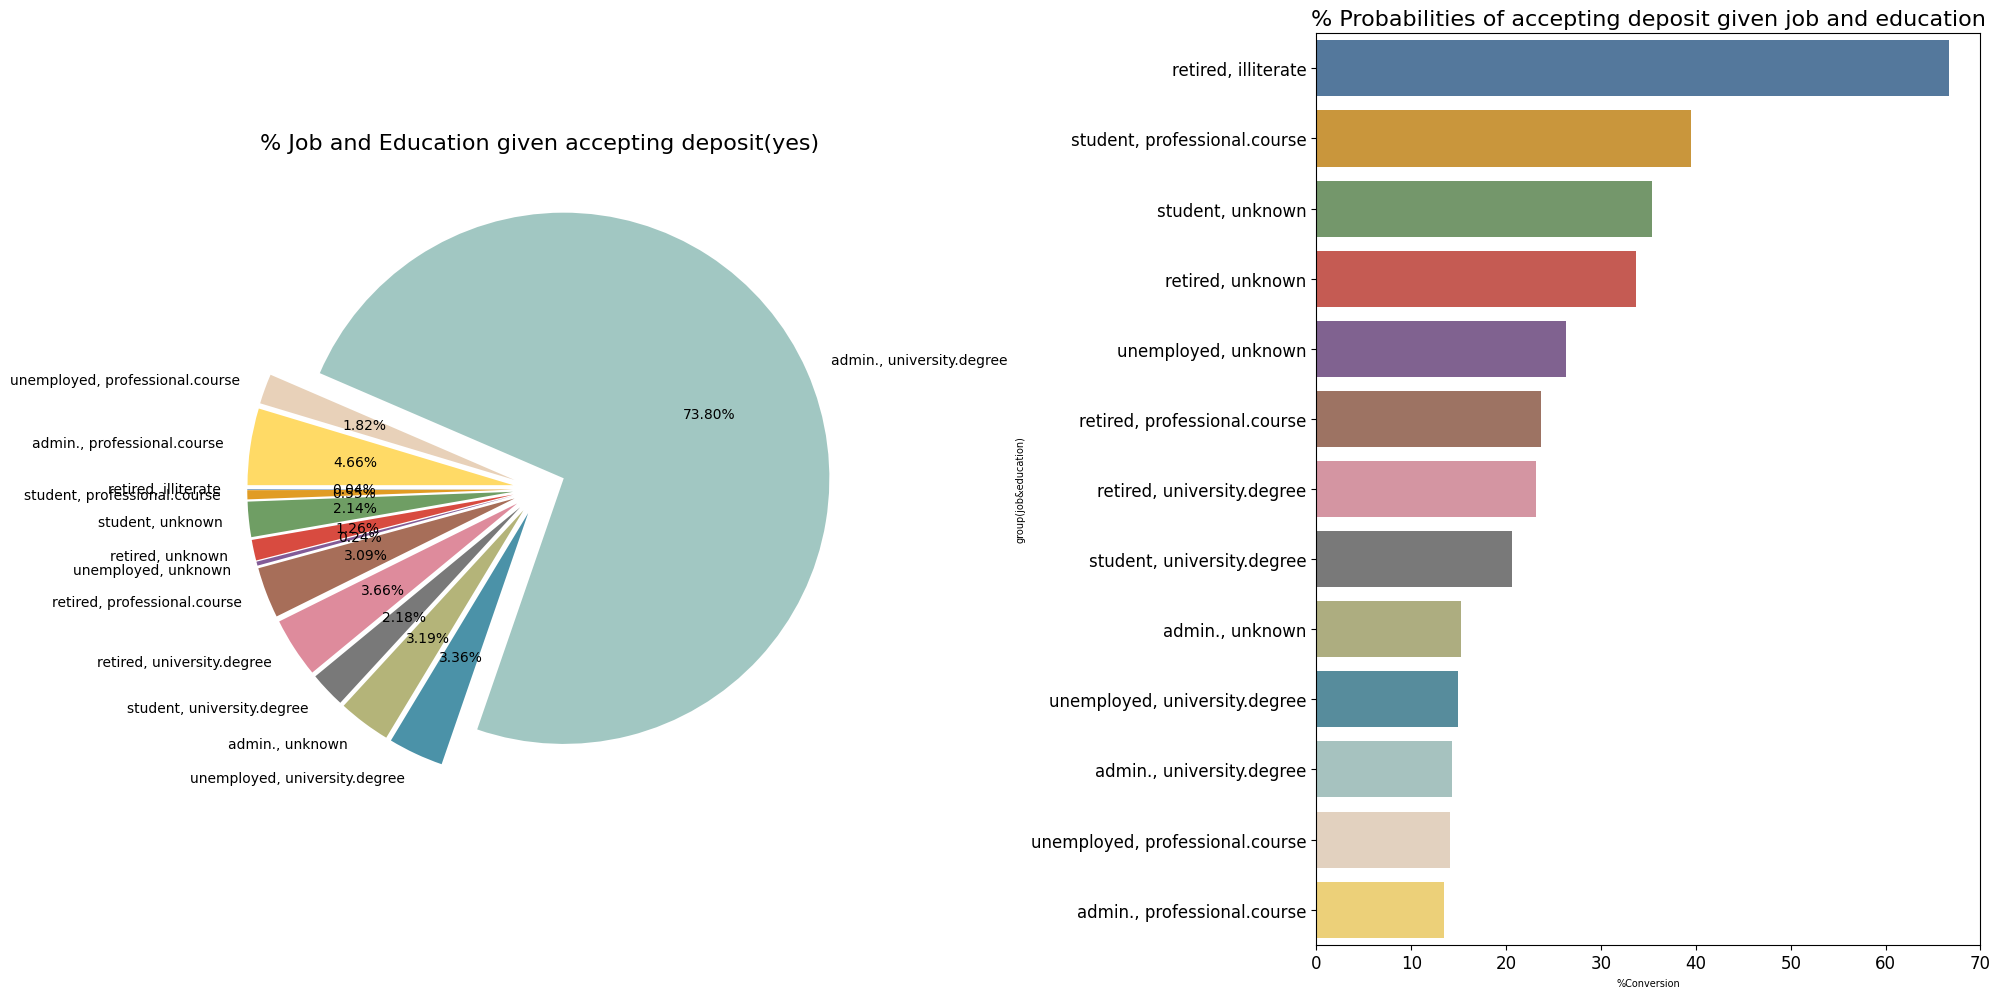

In [58]:
color_mapping = dict(zip(job_edu_layer["group(job&education)"], custom_colors))

f, ax = plt.subplots(1, 2, figsize=(20, 10))

# pie chart for % Job and Education given accepting deposit
job_edu_layer["count"].plot.pie(
    explode=[0.1] * len(job_edu_layer),
    autopct="%1.2f%%",
    fontsize=10,
    ax=ax[0],
    labels=job_edu_layer["group(job&education)"],
    startangle=180,
    colors=custom_colors,
)
ax[0].set_title("% Job and Education given accepting deposit(yes)", fontsize=16)
ax[0].set_ylabel("")

# barplot for % Probabilities of accepting deposit given job and education
sns.barplot(
    job_edu_layer,
    x="%Conversion",
    y="group(job&education)",
    hue="group(job&education)",
    legend=False,
    ax=ax[1],
    palette=[color_mapping[x] for x in job_edu_layer["group(job&education)"]],
)
ax[1].set_title(
    "% Probabilities of accepting deposit given job and education", fontsize=16
)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

Given the findings above :
- retired and illiterate is very rare, but has a huge chance of accepting the offer (66.7%). This group might prefer safe investment options.
- people who works as admin and has university degree makes up the majority of the population (73.8%) don't have the best, but still decent chance of accepting the offer (14.3%). This may because of their good understanding of financial literacy.
- people who works as admin and has professional course have the lowest chance of accepting the offer (13.49%) compared with the other, but still is a decent number. 

**Conclusion** : if the top 4 pairings (retired and illiterate, student and professional course, student unknown, retired unknown) comes up, engaging with them might be recommended.

---

#### **% Conversion by Marital Status**

In [59]:
# marital count given accept deposit
marital_deposit1 = (
    df_yes["marital"]
    .value_counts()
    .reset_index()
    .rename({"count": "CountDeposit"}, axis=1)
)
marital_deposit1


,marital,CountDeposit
0,married,2532
1,single,1620
2,divorced,476
3,unknown,12


In [60]:
# calculating conversion rate of each marital
marital_deposit = df["marital"].value_counts().reset_index()
marital_deposit["%maritalCount"] = marital_deposit["count"] / len(df) * 100
marital_convert = pd.merge(marital_deposit, marital_deposit1, how="inner", on="marital")
marital_convert["%Conversion"] = (
    marital_convert["CountDeposit"] / marital_convert["count"] * 100
)
marital_convert = marital_convert.sort_values(by="%Conversion", ascending=False)
marital_convert


,marital,count,%maritalCount,CountDeposit,%Conversion
3,unknown,80,0.194231,12,15.000000
1,single,11568,28.085850,1620,14.004149
2,divorced,4612,11.197436,476,10.320902
0,married,24928,60.522482,2532,10.157253


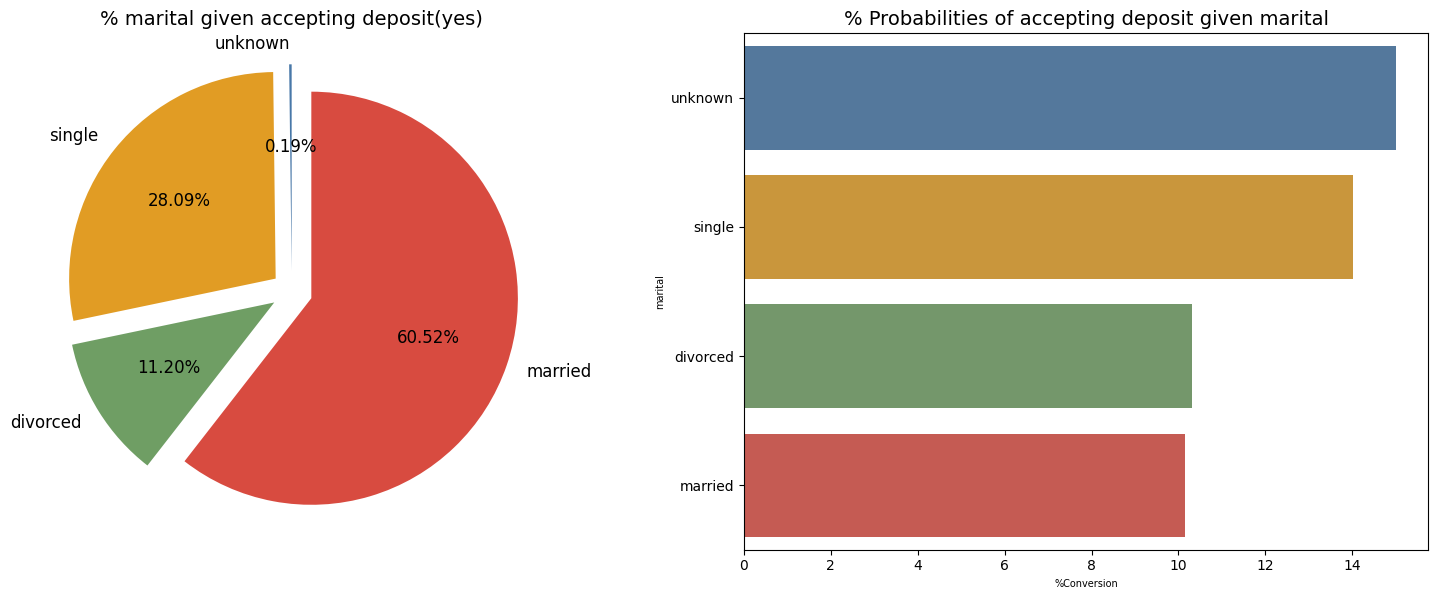

In [61]:
color_mapping = dict(zip(marital_convert["marital"], custom_colors))

f, ax = plt.subplots(1, 2, figsize=(15, 6))

# pie chart for % marital given accepting deposit
marital_convert["count"].plot.pie(
    explode=[0.1, 0.1, 0.1, 0.1],
    autopct="%1.2f%%",
    fontsize=12,
    ax=ax[0],
    labels=marital_convert["marital"],
    startangle=90,
    colors=custom_colors,
)
ax[0].set_title("% marital given accepting deposit(yes)", fontsize=14)
ax[0].set_ylabel("")

# barplot for % Probabilities of accepting deposit given marital
sns.barplot(
    marital_convert,
    x="%Conversion",
    y="marital",
    hue="marital",
    legend=False,
    ax=ax[1],
    palette=[color_mapping[x] for x in marital_convert["marital"]],
)
ax[1].set_title("% Probabilities of accepting deposit given marital", fontsize=14)

ax[1].tick_params(axis='x', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()


Given the findings above :
- unknown status have the highest chances of accepting the offer (15%), followed by single (14%)
- while people who married makes up the highest proportion (60.52%), they have the least chance of accepting the offer (10%)
- marital status might not be a good predictor since they all have similar chance.

**Conclusion** : unknown status and single status have the highest acceptance rate.

---

#### **% Conversion by Previous Outcome**

In [62]:
# previous outcome given accept deposit
poutcome_deposit1 = (
    df_yes["poutcome"]
    .value_counts()
    .reset_index()
    .rename({"count": "CountDeposit"}, axis=1)
)
poutcome_deposit1


,poutcome,CountDeposit
0,nonexistent,3141
1,success,894
2,failure,605


In [63]:
# calculating conversion rate of previous outcome
poutcome_deposit = df["poutcome"].value_counts().reset_index()
poutcome_deposit["%OutcomeCount"] = poutcome_deposit["count"] / len(df) * 100
poutcome_convert = pd.merge(
    poutcome_deposit, poutcome_deposit1, how="inner", on="poutcome"
)
poutcome_convert["%Conversion"] = (
    poutcome_convert["CountDeposit"] / poutcome_convert["count"] * 100
)
poutcome_convert = poutcome_convert.sort_values(by="%Conversion", ascending=False)
poutcome_convert

,poutcome,count,%OutcomeCount,CountDeposit,%Conversion
2,success,1373,3.333495,894,65.112891
1,failure,4252,10.323395,605,14.228598
0,nonexistent,35563,86.343110,3141,8.832213


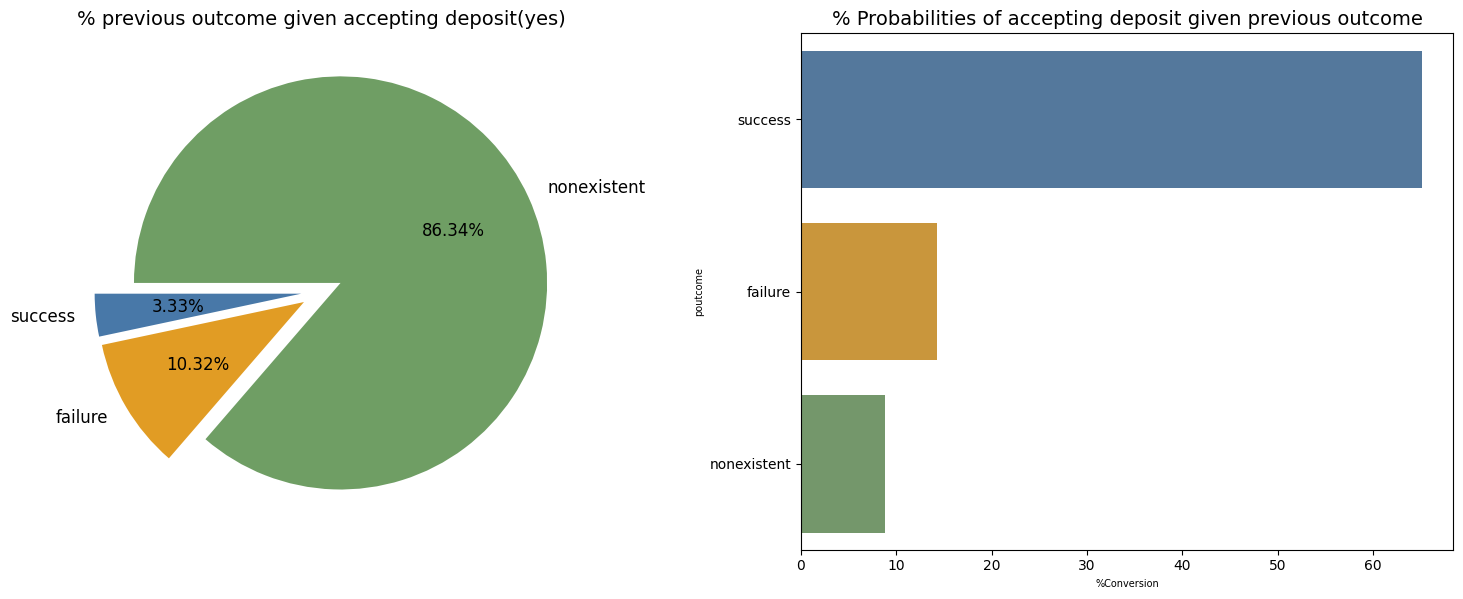

In [64]:
color_mapping = dict(zip(poutcome_convert["poutcome"], custom_colors))

f, ax = plt.subplots(1, 2, figsize=(15, 6))

# pie chart for % previous outcome given accepting deposit
poutcome_convert["count"].plot.pie(
    explode=[0.1, 0.1, 0.1],
    autopct="%1.2f%%",
    fontsize=12,
    ax=ax[0],
    labels=poutcome_convert["poutcome"],
    startangle=180,
    colors=custom_colors,
)
ax[0].set_title("% previous outcome given accepting deposit(yes)", fontsize=14)
ax[0].set_ylabel("")

# barplot for % Probabilities of accepting deposit given poutcome
sns.barplot(
    poutcome_convert,
    x="%Conversion",
    y="poutcome",
    hue="poutcome",
    legend=False,
    ax=ax[1],
    palette=[color_mapping[x] for x in poutcome_convert["poutcome"]],
)
ax[1].set_title("% Probabilities of accepting deposit given previous outcome", fontsize=14)
ax[1].tick_params(axis='x', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()


From the findings above :
- those who had accepted a deposit offer in the past, have a huge chance of accepting another offer (65%) even though they made up only 3% of population. This might indicate that these are the premium customers and should have high attention.
- people who had not been engaged before appeared the most (86%) and have the least chance of accepting (8%) suggesting that they have very little interest in the first place or might still be unaware of the product

**Conclusion** : people who previously accepted the offer have a very high acceptance rate.

---

#### **% Conversion by Default**

In [65]:
# default count given accepted deposit
default_deposit1 = (
    df_yes["default"]
    .value_counts()
    .reset_index()
    .rename({"count": "CountDeposit"}, axis=1)
)
default_deposit1


,default,CountDeposit
0,no,4197
1,unknown,443


In [66]:
# calculating default conversion rate
default_deposit = df["default"].value_counts().reset_index()
default_deposit["%defaultCount"] = default_deposit["count"] / len(df) * 100
default_convert = pd.merge(default_deposit, default_deposit1, how="inner", on="default")
default_convert["%Conversion"] = (
    default_convert["CountDeposit"] / default_convert["count"] * 100
)
default_convert = default_convert.sort_values(by="%Conversion", ascending=False)
default_convert


,default,count,%defaultCount,CountDeposit,%Conversion
0,no,32588,79.120132,4197,12.878974
1,unknown,8597,20.872584,443,5.152960


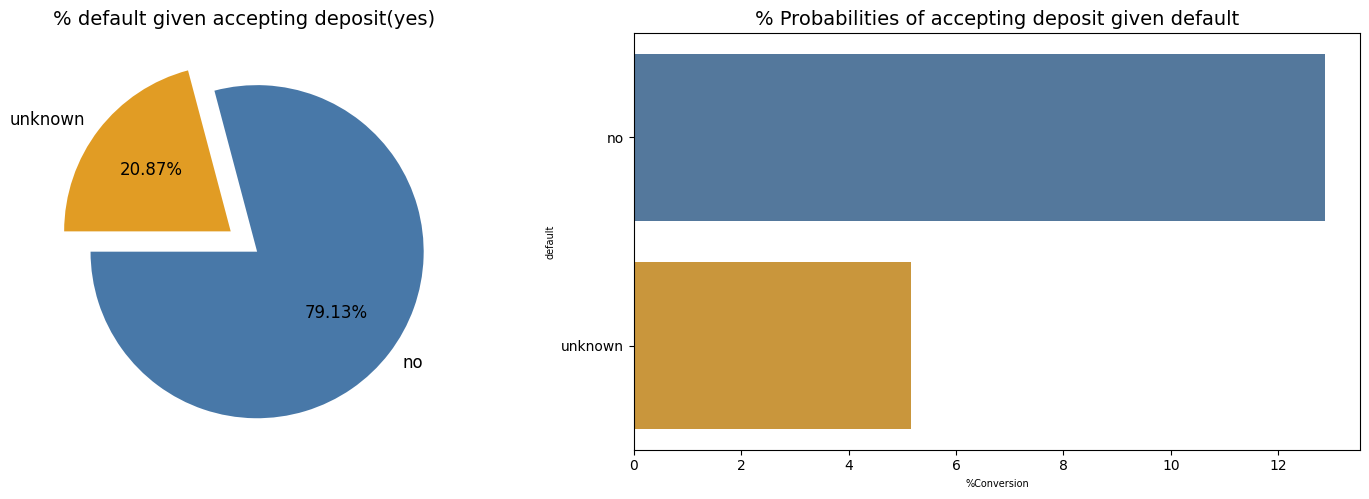

In [67]:
color_mapping = dict(zip(default_convert["default"], custom_colors))

f, ax = plt.subplots(1, 2, figsize=(15, 5))

# pie chart for % default given accepting deposit
default_convert["count"].plot.pie(
    explode=[0.1, 0.1],
    autopct="%1.2f%%",
    fontsize=12,
    ax=ax[0],
    labels=default_convert["default"],
    startangle=180,
    colors=custom_colors,
)
ax[0].set_title("% default given accepting deposit(yes)", fontsize=14)
ax[0].set_ylabel("")

# barplot for % Probabilities of accepting deposit given default
sns.barplot(
    default_convert,
    x="%Conversion",
    y="default",
    hue="default",
    legend=False,
    ax=ax[1],
    palette=[color_mapping[x] for x in default_convert["default"]],
)
ax[1].set_title("% Probabilities of accepting deposit given default", fontsize=14)

ax[1].tick_params(axis='x', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()


From the findings above :
- we see that no one that experienced default (yes) accepted the deposit offer.
- people that have no default experience made up the highest proportion (79%) have decent change of accepting the offer (12%). This indicates that the bank's customer base generally have healthy financial status

**Conclusion** : those who have no default experience have higher chance of conversion

---

#### **% Conversion by Personal Loan and Housing Loan**

In [68]:
loan_housing_layer = (
    df.groupby(['loan', 'housing'])
    .size()
    .reset_index(name='count')
    .merge(
        df_yes.groupby(['loan', 'housing'])
        .size()
        .reset_index(name='CountDeposit'),
        on=['loan', 'housing'],
        how='left'
    )
)

# Calculate percentages
loan_housing_layer['%GroupCount'] = loan_housing_layer['count'] / len(df) * 100
loan_housing_layer['%Conversion'] = (loan_housing_layer['CountDeposit'] / loan_housing_layer['count']) * 100

# Create group labels
loan_housing_layer['group(loan&housing)'] = loan_housing_layer[['loan', 'housing']].agg(', '.join, axis=1)

# Select and reorder the desired columns
loan_housing_layer = loan_housing_layer[['group(loan&housing)', 'count', '%GroupCount', 'CountDeposit', '%Conversion']]

# Sort and select top 5 pairs with the highest conversion rates
loan_housing_layer = loan_housing_layer.sort_values(by='%Conversion', ascending=False).head(5)

loan_housing_layer

,group(loan&housing),count,%GroupCount,CountDeposit,%Conversion
1,"no, yes",17885,43.422842,2098,11.730500
4,"yes, yes",3691,8.961348,409,11.081008
0,"no, no",16065,39.004079,1752,10.905696
2,"unknown, unknown",990,2.403613,107,10.808081
3,"yes, no",2557,6.208119,274,10.715682


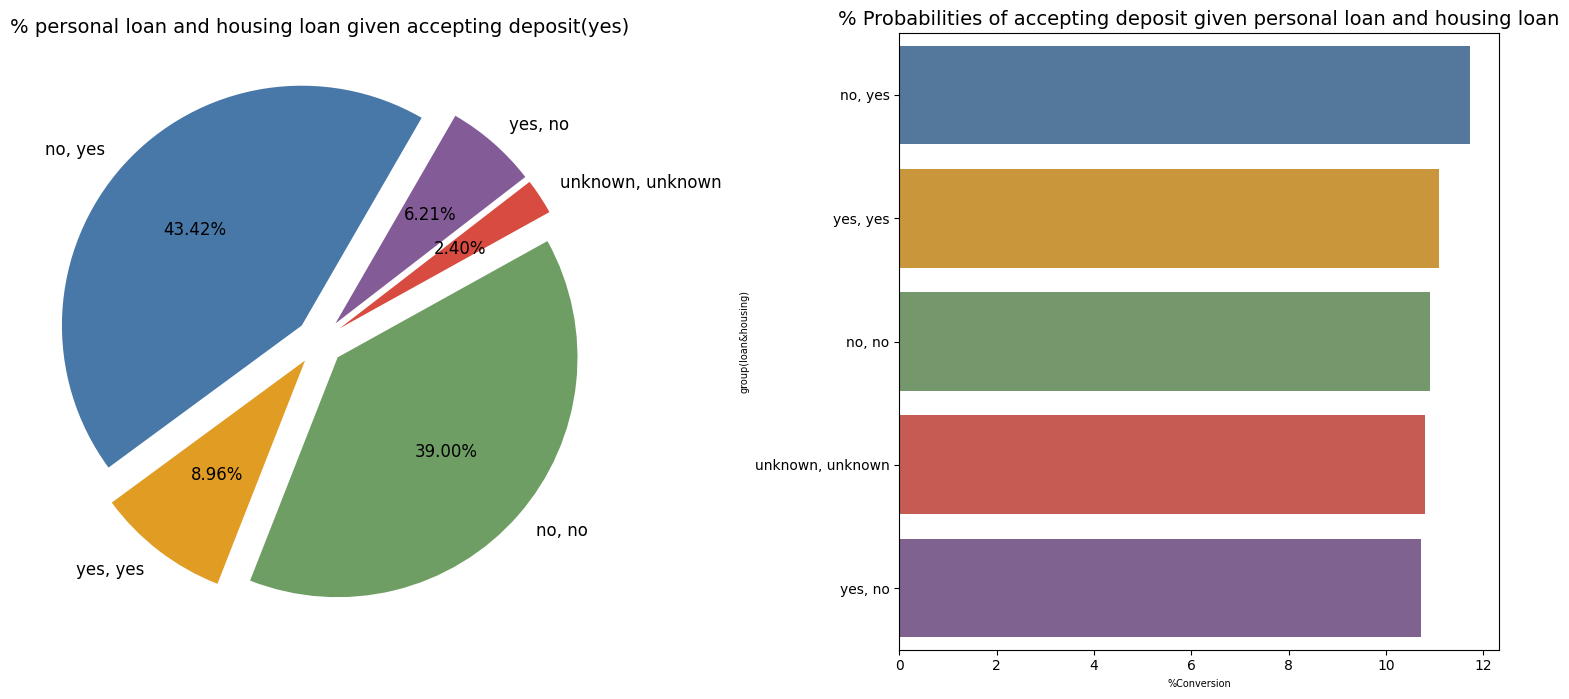

In [69]:
color_mapping = dict(zip(loan_housing_layer["group(loan&housing)"], custom_colors))

f, ax = plt.subplots(1, 2, figsize=(15, 7))

# pie chart for % personal loan and housing loan given accepting deposit
loan_housing_layer["count"].plot.pie(
    explode=[0.1, 0.1, 0.1, 0.1, 0.1],
    autopct="%1.2f%%",
    fontsize=12,
    ax=ax[0],
    labels=loan_housing_layer["group(loan&housing)"],
    startangle=60,
    colors=custom_colors,
)
ax[0].set_title(
    "% personal loan and housing loan given accepting deposit(yes)", fontsize=14
)
ax[0].set_ylabel("")


# barplot for % Probabilities of accepting deposit given personal loan and housing loan
sns.barplot(
    loan_housing_layer,
    x="%Conversion",
    y="group(loan&housing)",
    hue="group(loan&housing)",
    legend=False,
    ax=ax[1],
    palette=[color_mapping[x] for x in loan_housing_layer["group(loan&housing)"]],
)
ax[1].set_title(
    "% Probabilities of accepting deposit given personal loan and housing loan",
    fontsize=14,
)
ax[1].tick_params(axis='x', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

From the charts above :

We can conclude that regardless of the person has personal loan and/or housing loan or not , they have similar probability of accepting the offer. 

---

#### **% Conversion by Month**

In [70]:
# month count given accepted deposit
month_deposit1 = (
    df_yes["month"]
    .value_counts()
    .reset_index()
    .rename({"count": "CountDeposit"}, axis=1)
)
month_deposit1


,month,CountDeposit
0,may,886
1,aug,655
2,jul,649
3,jun,559
4,apr,539
5,nov,416
6,oct,315
7,mar,276
8,sep,256
9,dec,89


In [71]:
# calculating conversion rate by month
month_deposit = df["month"].value_counts().reset_index()
month_deposit["%monthCount"] = month_deposit["count"] / len(df) * 100
month_convert = pd.merge(month_deposit, month_deposit1, how="inner", on="month")
month_convert["%Conversion"] = (
    month_convert["CountDeposit"] / month_convert["count"] * 100
)
month_convert = month_convert.sort_values(by="%Conversion", ascending=False)
month_convert


,month,count,%monthCount,CountDeposit,%Conversion
8,mar,546,1.325629,276,50.549451
9,dec,182,0.441876,89,48.901099
7,sep,570,1.383898,256,44.912281
6,oct,718,1.743226,315,43.871866
5,apr,2632,6.390211,539,20.478723
2,aug,6178,14.999514,655,10.602137
3,jun,5318,12.911528,559,10.511470
4,nov,4101,9.956784,416,10.143867
1,jul,7174,17.417694,649,9.046557
0,may,13769,33.429640,886,6.434745


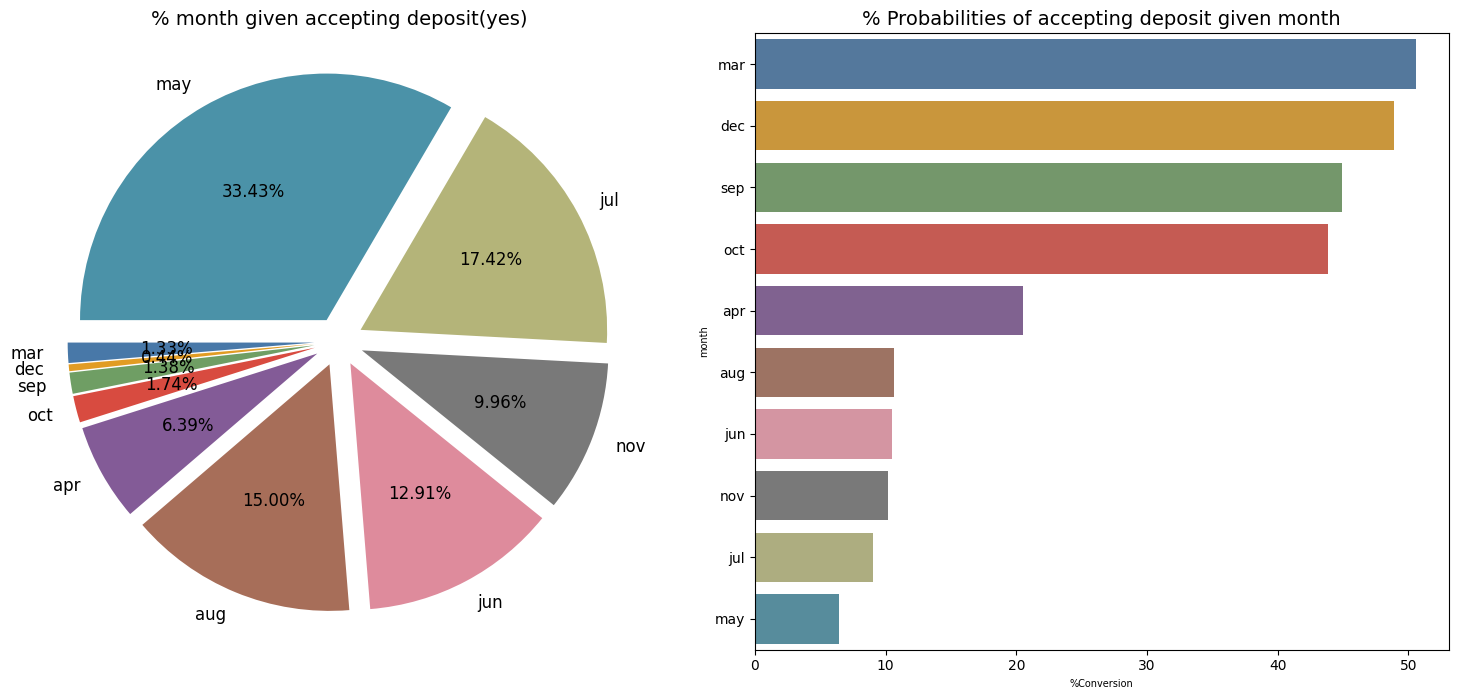

In [72]:
color_mapping = dict(zip(month_convert["month"], custom_colors))

f, ax = plt.subplots(1, 2, figsize=(15, 7))

# pie chart for % month given accepting deposit
month_convert["count"].plot.pie(
    explode=[0.1] * len(month_convert),
    autopct="%1.2f%%",
    fontsize=12,
    ax=ax[0],
    labels=month_convert["month"],
    startangle=180,
    colors=custom_colors,
)
ax[0].set_title("% month given accepting deposit(yes)", fontsize=14)
ax[0].set_ylabel("")

# barplot for % Probabilities of accepting deposit given month
sns.barplot(
    month_convert,
    x="%Conversion",
    y="month",
    hue="month",
    legend=False,
    ax=ax[1],
    palette=[color_mapping[x] for x in month_convert["month"]],
)
ax[1].set_title("% Probabilities of accepting deposit given month", fontsize=14)

ax[1].tick_params(axis="x", labelsize=10)
ax[1].tick_params(axis="y", labelsize=10)

plt.tight_layout()
plt.show()


There appears to be a trend where certain months have significantly higher conversion rates : 
- we can see that may was the busiest but it had only converted 6% out of global calls, this may be due to factors like pre-summer expenses or lower disposable income during this period.
- March was the most successful month during the previous campaign as half of the people called were converted, possibly due to factors like financial planning at the start of the year, tax season.

**Conclusion** : the findings suggests that March, December, and September are particularly strong months for deposit offers.

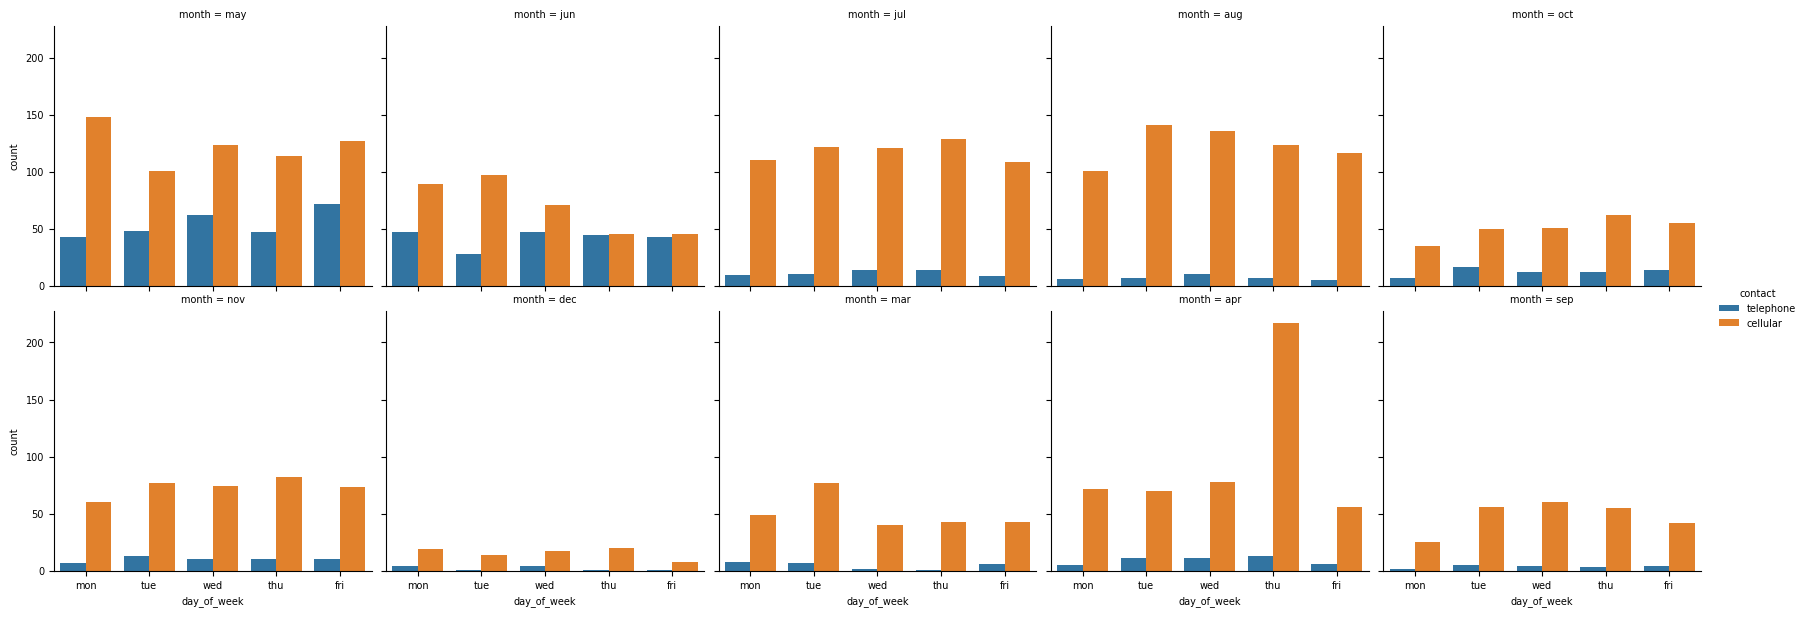

In [73]:
g = sns.catplot(
    x="day_of_week",
    hue="contact",
    col="month",
    data=df_yes,
    kind="count",
    height=4,
    aspect=0.9,
    col_wrap=5,
)

g.fig.set_size_inches(18, 6)

plt.show()

The most active months during previous engagements were on May, June, July and August. There was an unusual spike of customer acceptance during Thursdays throughout April. Most of the customer base prefer using cellular as their communication device

---

## **5. Feature Engineering**

Next, we'll conduct feature engineering, which includes data imputation to fill missing values and data encoding to convert categorical textual data into a format usable by machine learning models. We will also normalize numerical features and, finally, split the data into training, test, and unseen sets for real scenario prediction.

### **5.1. Data Imputation**

For the imputation process, we'll use the Iterative Imputer because it handles complex relationships and interactions between features and preserves the overall distribution and relationships within the data better than simple imputation methods. This is our main concern, as we want to use the data without altering its distribution and relationships, aiming for better generalization.

Here's the data that still contains unknown values.

In [74]:
info = pd.DataFrame({
    "name": df.columns,
    "unique": [df[col].unique() for col in df.columns],
    "nunique": [df[col].nunique() for col in df.columns],
    "null": [df[col].isna().sum() for col in df.columns]
})

info

,name,unique,nunique,null
0,age,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]",78,0
1,job,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]",12,0
2,marital,"[married, single, divorced, unknown]",4,0
3,education,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]",8,0
4,default,"[no, unknown, yes]",3,0
5,housing,"[no, yes, unknown]",3,0
6,loan,"[no, yes, unknown]",3,0
7,contact,"[telephone, cellular]",2,0
8,month,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]",10,0
9,day_of_week,"[mon, tue, wed, thu, fri]",5,0


In [75]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder

# selecting col that contains unknown
col_unknown = [col for col in df.columns if df[col].isin(["unknown"]).any()]

orderings = {
    "marital": ["single", "married", "divorced", "unknown"],
    "education": [
        "illiterate",
        "basic.4y",
        "basic.6y",
        "basic.9y",
        "high.school",
        "professional.course",
        "university.degree",
        "unknown",
    ],
    "job": [
        "unemployed",
        "retired",
        "student",
        "housemaid",
        "admin.",
        "services",
        "blue-collar",
        "technician",
        "management",
        "self-employed",
        "entrepreneur",
        "unknown",
    ],
    "default": ["no", "yes", "unknown"],
    "housing": ["no", "yes", "unknown"],
    "loan": ["no", "yes", "unknown"],
    "month": ["mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    "contact": ["telephone", "cellular"],
    "day_of_week": ["mon", "tue", "wed", "thu", "fri"],
    "poutcome": ["nonexistent", "failure", "success"],
}

# # create new dataframe df2 in to be imputted
cat_cols = [col for col in df.columns if df[col].dtype == "object"]
for col in cat_cols:
    encoder = OrdinalEncoder(categories=[orderings[col]], dtype=int)
    df[col] = encoder.fit_transform(df[[col]])


# check the encoder for unkwnown
nan_encodes = {}
for col in col_unknown:
    nan_encoder = len(df[col].unique()) - 1
    nan_encodes[col] = nan_encoder

for col in col_unknown:
    df[col] = df[col].map(lambda x: np.nan if x == nan_encodes[col] else x)


# unrelated feature to be exclude from the iterative imputter process
unrelated_feature = [
    "emp.var.rate",
    "cons.price.idx",
    "cons.conf.idx",
    "euribor3m",
    "nr.employed",
    "y",
]
related_feature = [col for col in df.columns if col not in unrelated_feature]
related_feature

# fit and transform the whole dataframe with dataframe
imputer = IterativeImputer(
    max_iter=10, random_state=0, initial_strategy="most_frequent"
)
df_imputed = imputer.fit_transform(df[related_feature])
df_imputed = pd.DataFrame(df_imputed, columns=related_feature)

for col in df_imputed.columns:
    df.loc[:, col] = df_imputed[col]
df[df_imputed.columns] = df[df_imputed.columns].astype(int)


# reverse mapping
for column in cat_cols:
    values = orderings[column]
    for i, value in enumerate(values):
        df.loc[df[column] == i, column] = value


Data after imputation:

In [76]:
# check unique values
info = pd.DataFrame({
    "name": df.columns,
    "unique": [df[col].unique() for col in df.columns],
    "nunique": [df[col].nunique() for col in df.columns],
    "null": [df[col].isna().sum() for col in df.columns]
})

info

,name,unique,nunique,null
0,age,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]",78,0
1,job,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, entrepreneur, student]",11,0
2,marital,"[married, single, divorced]",3,0
3,education,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, university.degree, illiterate]",7,0
4,default,"[no, yes]",2,0
5,housing,"[no, yes]",2,0
6,loan,"[no, yes]",2,0
7,contact,"[telephone, cellular]",2,0
8,month,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]",10,0
9,day_of_week,"[mon, tue, wed, thu, fri]",5,0


Now, after data imputation, the unknown values have been replaced with values from the imputer. The Iterative Imputer works by modeling each feature with missing values as a function of other features, iteratively predicting and updating missing values based on these relationships until the imputations stabilize.

### **5.2. Data Encoding and Normalization**

In [77]:
categorical = pd.Series(df.select_dtypes("object").columns, name="Categorical Columns")
numerical = pd.Series(df.select_dtypes("number").columns, name="Numerical Columns")

print("Categorical Columns:")
print(categorical)
print("\nNumerical Columns:")
print(numerical)

Categorical Columns:
0            job
1        marital
2      education
3        default
4        housing
5           loan
6        contact
7          month
8    day_of_week
9       poutcome
Name: Categorical Columns, dtype: object

Numerical Columns:
0                age
1           duration
2           campaign
3              pdays
4           previous
5       emp.var.rate
6     cons.price.idx
7      cons.conf.idx
8          euribor3m
9        nr.employed
10                 y
Name: Numerical Columns, dtype: object


Before preprocessing the data, we need to drop the **duration** feature. Since our goal is to determine whether or not to call a client, the duration feature only becomes relevant after the client has already been contacted. Therefore, it doesn't contribute to the decision-making process and should be removed from the dataset.

In [78]:
nominal_features = [
    "marital",
    "default",
    "housing",
    "contact",
    "loan",
    "month",
    "day_of_week",
]
ordinal_features = ["education", "poutcome"]
ordinal_ordering = [
    [
        "illiterate",
        "basic.4y",
        "basic.6y",
        "basic.9y",
        "high.school",
        "university.degree",
        "professional.course",
    ],
    ["nonexistent", "failure", "success"],
]

binary_features = ["job"]
numerical_features = list(numerical)
numerical_features.remove("duration")
numerical_features.remove("y")

print("Nominal Features:")
print(nominal_features)

print("\nOrdinal Features:")
print(ordinal_features)

print("\nBinary Features:")
print(binary_features)

print("\nOrdinal Ordering:")
print(ordinal_ordering)

Nominal Features:
['marital', 'default', 'housing', 'contact', 'loan', 'month', 'day_of_week']

Ordinal Features:
['education', 'poutcome']

Binary Features:
['job']

Ordinal Ordering:
[['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'university.degree', 'professional.course'], ['nonexistent', 'failure', 'success']]


In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder
import category_encoders as ce

transformer = ColumnTransformer(
    [
        (
            "nominal",
            OneHotEncoder(drop="first", handle_unknown="ignore"),
            nominal_features,
        ),
        ("binary", ce.BinaryEncoder(), binary_features),
        ("ordinal", OrdinalEncoder(categories=ordinal_ordering), ordinal_features),
        ("normalize", RobustScaler(), numerical_features),
    ],
    remainder="drop",
)


In this case, we simplify the transformation of numerical features by using only the Robust Scaler, which is effective for handling outliers. However, since some of our numerical features do not contain significant outliers, applying this scaler universally might not be ideal. For features without outliers, other scaling methods could be more appropriate. In the future, we should consider using different scalers based on the presence of outliers in each feature.

In [80]:
transformer

ColumnTransformer(transformers=[('nominal',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['marital', 'default', 'housing', 'contact',
                                  'loan', 'month', 'day_of_week']),
                                ('binary', BinaryEncoder(), ['job']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['illiterate',
                                                             'basic.4y',
                                                             'basic.6y',
                                                             'basic.9y',
                                                             'high.school',
                                                             'university.degree',
                                                             'professional.course'],
                                                            ['nonexistent',
                                                             'failure',
                                                             'success']]),
                                 ['education', 'poutcome']),
                                ('normalize', RobustScaler(),
                                 ['age', 'campaign', 'pdays', 'previous',
                                  'emp.var.rate', 'cons.price.idx',
                                  'cons.conf.idx', 'euribor3m',
                                  'nr.employed'])])

In [81]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [82]:
df_preprocessed = transformer.fit_transform(df)
df_preprocessed

array([[ 1.        ,  0.        ,  0.        , ...,  0.85714286,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.85714286,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.85714286,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -1.42857143,
        -1.05861211, -1.7627907 ],
       [ 1.        ,  0.        ,  0.        , ..., -1.42857143,
        -1.05861211, -1.7627907 ],
       [ 1.        ,  0.        ,  0.        , ..., -1.42857143,
        -1.05861211, -1.7627907 ]])

**Data Splitting**

We'll split the dataset into three parts: training data, testing data for evaluating our machine learning model, and a separate dataset reserved for model predictions in our dashboard use case. This reserved dataset will later be used to define control and treatment groups. The proportions will be as follows:

- Training Data: 70%
- Testing Data: 20%
- Testing Data for Dashboard: 10%

In [84]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["y"])
y = df["y"]

# First, we'll split the data into training and testing sets
X_train, X_test_set, y_train, y_test_set = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=0
)


In [85]:
y_train.value_counts(normalize=True)

y
0    0.887343
1    0.112657
Name: proportion, dtype: float64

In [86]:
# Next, we'll split the testing set into data for machine learning testing and for the dashboard.

X_test, X_test_dash, y_test, y_test_dash = train_test_split(
    X_test_set, y_test_set, stratify=y_test_set, test_size=0.33, random_state=0
)


## **6. Model Selection and Training**

### **6.1. Defining Models for Benchmarking**

We'll use the following models to find the most suitable with the best performance:

**Base Models:**
1. Logistic Regression
2. K-Nearest Neighbors (KNN) 
3. Decision Tree

**Ensemble Model :**
1. Random Forest
2. AdaBoost
3. Gradient Boosting
2. Light Gradient Boosting
3. XGBoost

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from xgboost.sklearn import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, cross_val_score
from imblearn.over_sampling import RandomOverSampler, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.model_selection import (
    StratifiedKFold,
    KFold,
    GridSearchCV,
    RandomizedSearchCV,
)
from sklearn.metrics import roc_auc_score, roc_curve
import lightgbm as lgb


In [88]:
logreg = LogisticRegression(random_state=0, solver="liblinear", verbose=False)
knn = KNeighborsClassifier(n_neighbors=5)
dtree = DecisionTreeClassifier(random_state=0, max_depth=5)
rf = RandomForestClassifier(random_state=0, verbose=False)
ada = AdaBoostClassifier(random_state=0)
gbm = GradientBoostingClassifier(random_state=0, verbose=False)
lgbm = lgb.LGBMClassifier(verbose=0, random_state=0)
xgboost = XGBClassifier()


models = [
    ("Logistic Regression", logreg),
    ("KNN", knn),
    ("Decision Tree", dtree),
    ("Random Forest", rf),
    ("AdaBoost", ada),
    ("Gradient Boosting", gbm),
    ("Light GBM", lgbm),
    ("XGBoost", xgboost),
]


### **6.2. Model Benchmarking**

In [89]:
def benchmarking(
    X_train,
    y_train,
    models,
):

    names = []
    aucs = []
    std = []
    maximum = []

    for name, model in models:
        pipe_model = Pipeline([("preprocessing", transformer), ("model", model)])

        skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

        model_cv = cross_val_score(
            estimator=pipe_model,
            X=X_train,
            y=y_train,
            cv=skfold,
            scoring="roc_auc",
            n_jobs=-1,
        )

        print(model_cv)
        names.append(name)
        aucs.append(round(model_cv.mean(), 3))
        std.append(round(model_cv.std(), 3))
        maximum.append(round(model_cv.max(), 3))

    result = pd.DataFrame(
        {
            "model": names,
            "auc_mean_no_resample": aucs,
            "auc_std_no_resample": std,
            "max auc": maximum,
        }
    )

    return result.sort_values("auc_mean_no_resample", ascending=False)


In [90]:
result_df_no_resample = benchmarking(X_train, y_train, models)

[0.80541979 0.81140345 0.7781098  0.79902824 0.78029786]
[0.73306144 0.74759789 0.71044779 0.73483867 0.7106073 ]
[0.78822492 0.79364383 0.76845317 0.7580894  0.76942849]
[0.7841172  0.79023756 0.76713472 0.77273681 0.75691406]


/home/farik/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/farik/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/farik/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/farik/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

[0.80813893 0.81165429 0.77722556 0.79349056 0.78217463]
[0.81290074 0.8157313  0.78955086 0.80192759 0.7851266 ]
[0.80691165 0.81788521 0.7897776  0.80377789 0.78921047]
[0.79101637 0.80676966 0.77197161 0.78544942 0.7805658 ]


In [91]:
result_df_no_resample

,model,auc_mean_no_resample,auc_std_no_resample,max auc
6,Light GBM,0.802,0.011,0.818
5,Gradient Boosting,0.801,0.012,0.816
0,Logistic Regression,0.795,0.013,0.811
4,AdaBoost,0.795,0.014,0.812
7,XGBoost,0.787,0.012,0.807
2,Decision Tree,0.776,0.013,0.794
3,Random Forest,0.774,0.012,0.790
1,KNN,0.727,0.015,0.748


### **Benchmarking with Resampling**

In [92]:
from imblearn.pipeline import Pipeline

ros = RandomOverSampler(random_state=0)
smotenc = SMOTENC(random_state=0, categorical_features=[3, 14])
rus = RandomUnderSampler(random_state=0)
Near = NearMiss(n_neighbors=3)

In [93]:
def resampling(X_train, y_train, resample_method):
    result = {}
    for name, model in models:

        pipe_model = Pipeline(
            [
                ("preprocessing", transformer),
                ("resampling", resample_method),
                ("model", model),
            ]
        )

        skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

        model_cv = cross_val_score(
            estimator=pipe_model,
            X=X_train,
            y=y_train,
            cv=skfold,
            scoring="roc_auc",
            n_jobs=-1,
        )

        result[name] = {}
        for i, score in enumerate(model_cv):
            result[name][i] = score

    result = pd.DataFrame(result).T
    result["auc_mean"] = np.round(result.values.mean(axis=1), 3)
    result["auc_std"] = np.round(result.values.std(axis=1), 3)
    result.index.name = "model"

    return result.sort_values("auc_mean", ascending=False)


In [94]:
result_df_Near = resampling(X_train, y_train, Near)
result_df_Near = result_df_Near.rename(
    {"auc_mean": "auc_mean_Nearmiss", "auc_std": "auc_std_Nearmiss"}, axis=1
)
result_df_Near


/home/farik/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/farik/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/farik/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/farik/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

,0,1,2,3,4,auc_mean_Nearmiss,auc_std_Nearmiss
model,,,,,,,
Random Forest,0.732536,0.735507,0.722920,0.708504,0.704808,0.721,0.011
Logistic Regression,0.716274,0.734483,0.722075,0.707051,0.694850,0.715,0.012
Gradient Boosting,0.716381,0.732151,0.712810,0.698439,0.697881,0.712,0.012
AdaBoost,0.715655,0.736467,0.715871,0.702774,0.687659,0.712,0.015
Light GBM,0.723374,0.725508,0.709426,0.699820,0.693896,0.710,0.011
Decision Tree,0.709287,0.715416,0.709707,0.705535,0.675100,0.703,0.013
KNN,0.708252,0.717808,0.695298,0.693458,0.687765,0.701,0.010
XGBoost,0.715989,0.715183,0.696416,0.689493,0.685600,0.701,0.012


In [95]:
result_df_ros = resampling(X_train, y_train, ros)
result_df_ros = result_df_ros.rename(
    {"auc_mean": "auc_mean_ros", "auc_std": "auc_std_ros"}, axis=1
)
result_df_ros


/home/farik/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/farik/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/farik/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/farik/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

,0,1,2,3,4,auc_mean_ros,auc_std_ros
model,,,,,,,
Gradient Boosting,0.811640,0.821695,0.791044,0.802472,0.791443,0.804,0.011
Light GBM,0.806374,0.815692,0.783277,0.799754,0.787080,0.798,0.011
AdaBoost,0.805911,0.812472,0.777490,0.794427,0.782389,0.795,0.012
Logistic Regression,0.805892,0.811709,0.776692,0.797679,0.780406,0.794,0.013
Decision Tree,0.788358,0.793843,0.783703,0.775330,0.775997,0.783,0.007
Random Forest,0.780560,0.788576,0.766152,0.765648,0.754787,0.771,0.011
XGBoost,0.768995,0.780207,0.754706,0.762120,0.758560,0.765,0.008
KNN,0.714977,0.728808,0.698204,0.718455,0.695912,0.711,0.011


In [96]:
result_df_rus = resampling(X_train, y_train, rus)
result_df_rus = result_df_rus.rename(
    {"auc_mean": "auc_mean_rus", "auc_std": "auc_std_rus"}, axis=1
)
result_df_rus


/home/farik/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/farik/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/farik/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/farik/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

,0,1,2,3,4,auc_mean_rus,auc_std_rus
model,,,,,,,
Gradient Boosting,0.810116,0.811710,0.793751,0.801127,0.789133,0.801,0.008
Logistic Regression,0.804125,0.809775,0.777589,0.795556,0.781135,0.794,0.011
Light GBM,0.800972,0.810169,0.786029,0.793993,0.779547,0.794,0.010
AdaBoost,0.802263,0.807498,0.774767,0.791359,0.778907,0.791,0.012
Decision Tree,0.792537,0.784849,0.785092,0.791996,0.777516,0.786,0.005
Random Forest,0.790032,0.789677,0.773930,0.780837,0.766634,0.780,0.008
XGBoost,0.780818,0.791164,0.778201,0.771549,0.758318,0.776,0.010
KNN,0.758970,0.764375,0.742222,0.752586,0.743398,0.752,0.008


In [97]:
result_df_smotenc = resampling(X_train, y_train, smotenc)
result_df_smotenc = result_df_smotenc.rename(
    {"auc_mean": "auc_mean_smotenc", "auc_std": "auc_std_smotenc"}, axis=1
)
result_df_smotenc


/home/farik/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/farik/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/farik/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/farik/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

,0,1,2,3,4,auc_mean_smotenc,auc_std_smotenc
model,,,,,,,
Light GBM,0.800654,0.810768,0.788310,0.793865,0.780462,0.795,0.009
Logistic Regression,0.803101,0.809435,0.771622,0.795495,0.780372,0.792,0.013
Gradient Boosting,0.802412,0.813564,0.773750,0.789370,0.777874,0.791,0.014
XGBoost,0.786606,0.801581,0.766929,0.779923,0.769796,0.781,0.011
AdaBoost,0.790035,0.793797,0.758446,0.774845,0.776315,0.779,0.011
Random Forest,0.786508,0.797083,0.767405,0.775514,0.762798,0.778,0.011
Decision Tree,0.754509,0.795776,0.741510,0.759826,0.753205,0.761,0.017
KNN,0.731089,0.745823,0.712739,0.739744,0.715123,0.729,0.012


In [98]:
from functools import reduce

columns_to_drop = ["max auc", "auc_std_no_resample"]

dfs = [
    result_df_no_resample.drop(
        [col for col in columns_to_drop if col in result_df_no_resample.columns], axis=1
    ),
    result_df_Near["auc_mean_Nearmiss"],
    result_df_ros["auc_mean_ros"],
    result_df_rus["auc_mean_rus"],
    result_df_smotenc["auc_mean_smotenc"],
]  # List of DataFrames to merge
merged_df_summary = reduce(lambda x, y: pd.merge(x, y, on="model", how="inner"), dfs)

auc_columns = [
    "auc_mean_no_resample",
    "auc_mean_Nearmiss",
    "auc_mean_ros",
    "auc_mean_rus",
    "auc_mean_smotenc",
]

# Create a new column with the name of the column that has the maximum value for each row
merged_df_summary["best_auc_mean"] = merged_df_summary[auc_columns].idxmax(axis=1)

display(merged_df_summary)


,model,auc_mean_no_resample,auc_mean_Nearmiss,auc_mean_ros,auc_mean_rus,auc_mean_smotenc,best_auc_mean
0,Light GBM,0.802,0.710,0.798,0.794,0.795,auc_mean_no_resample
1,Gradient Boosting,0.801,0.712,0.804,0.801,0.791,auc_mean_ros
2,Logistic Regression,0.795,0.715,0.794,0.794,0.792,auc_mean_no_resample
3,AdaBoost,0.795,0.712,0.795,0.791,0.779,auc_mean_no_resample
4,XGBoost,0.787,0.701,0.765,0.776,0.781,auc_mean_no_resample
5,Decision Tree,0.776,0.703,0.783,0.786,0.761,auc_mean_rus
6,Random Forest,0.774,0.721,0.771,0.780,0.778,auc_mean_rus
7,KNN,0.727,0.701,0.711,0.752,0.729,auc_mean_rus


Best model: 
- LGBM without resample
- Gradient Boosting with Random Over Sampling

#### **Hyperparameter Tuning**

**LGBM**

In [99]:
param_grid_lgbm = {
    "model__num_leaves": [31, 50, 70],  # Default: 31
    "model__learning_rate": [0.1, 0.05, 0.01],  # Default: 0.1
    "model__n_estimators": [100, 200, 300],  # Default: 100
    "model__min_child_samples": [20, 50, 100],  # Default: 20
    "model__subsample": [1.0, 0.6, 0.8],  # Default: 1.0
    "model__colsample_bytree": [1.0, 0.6, 0.8],  # Default: 1.0
    "model__reg_alpha": [0.0, 0.1, 1.0],  # Default: 0.0
    "model__reg_lambda": [0.0, 0.1, 1.0],  # Default: 0.0
    "model__scale_pos_weight": [1, 10, 30],  # Default: 1
    "model__max_depth": [-1, 10, 20],  # Default: -1 (no limit)
    "model__min_split_gain": [0.0, 0.1, 0.2],  # Default: 0.0
    "model__objective": ["binary"],  # Default: 'binary'
    "model__random_state": [
        0
    ],  # Default: None, using a specific seed for reproducibility
    "model__verbose": [
        -1
    ],  # Default: 0 (but -1 suppresses logs, which is often preferred)
}


In [100]:
# from sklearn.metrics._scorer import make_scorer


# Roc_auc_scorer = make_scorer(roc_auc_score) 

# k = 5 #number of splits
# kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=0)

# # Create the pipeline
# estimator = Pipeline([
#     ("estimator", transformer),
#     ("model", lgbm)
# ])

# # Initialize RandomSearchCV
# tuned_model = RandomizedSearchCV(
#     estimator=estimator,
#     param_distributions=param_grid_lgbm,
#     cv=kf,
#     verbose=0,  #to not display logging
#     scoring=Roc_auc_scorer,
#     n_jobs=-1,
#     random_state=0,
#     # n_iter=100
#     n_iter=50
# )

# # Fitting the model
# tuned_model.fit(X_train, y_train)

# best_model_lgbm= tuned_model.best_estimator_

# #best param
# print(f"best param in train set: {tuned_model.best_params_}")

Best param: {'model__verbose': -1, 'model__subsample': 0.6, 'model__scale_pos_weight': 10, 'model__reg_lambda': 1.0, 'model__reg_alpha': 0.1, 'model__random_state': 0, 'model__objective': 'binary', 'model__num_leaves': 31, 'model__n_estimators': 200, 'model__min_split_gain': 0.0, 'model__min_child_samples': 100, 'model__max_depth': 10, 'model__learning_rate': 0.01, 'model__colsample_bytree': 0.8}

In [101]:
lgbm = lgb.LGBMClassifier(verbose=0, random_state=0)

# Best parameters
best_params = {
    "verbose": -1,
    "subsample": 0.6,
    "scale_pos_weight": 10,
    "reg_lambda": 1.0,
    "reg_alpha": 0.1,
    "random_state": 0,
    "objective": "binary",
    "num_leaves": 31,
    "n_estimators": 200,
    "min_split_gain": 0.0,
    "min_child_samples": 100,
    "max_depth": 10,
    "learning_rate": 0.01,
    "colsample_bytree": 0.8,
}

# Update the classifier with the best parameters
lgbm.set_params(**best_params)

# Create the pipeline
estimator = Pipeline([("estimator", transformer), ("model", lgbm)])


tuned_model.best_score_
0.7538784253935712

**Gradient Boosting**

In [102]:
param_grid_gbm = {
    "model__learning_rate": [0.1, 0.05, 0.01],  # Default: 0.1
    "model__n_estimators": [100, 200, 300],  # Default: 100
    "model__max_depth": [3, 5, 7],  # Default: 3
    "model__min_samples_split": [2, 5, 10],  # Default: 2
    "model__min_samples_leaf": [1, 2, 4],  # Default: 1
    "model__subsample": [1.0, 0.8, 0.6],  # Default: 1.0
    "model__max_features": ["auto", "sqrt", "log2", None],  # Default: None
    "model__random_state": [
        0
    ],  # Default: None, using a specific seed for reproducibility
    "model__verbose": [0],  # Default: 0
}


In [103]:
# # Create the pipeline
# estimator = Pipeline([("estimator", transformer), ("resampler", ros), ("model", gbm)])

# # Initialize RandomSearchCV
# tuned_model_gbm = RandomizedSearchCV(
#     estimator=estimator,
#     param_distributions=param_grid_gbm,
#     cv=kf,
#     verbose=0,  # to not display logging
#     scoring=Roc_auc_scorer,
#     n_jobs=-1,
#     random_state=0,
#     # n_iter=100,
#     n_iter=50
# )

# # Fitting the model
# tuned_model_gbm.fit(X_train, y_train)

# best_model_gbm = tuned_model.best_estimator_

# # best param
# print(f"best param in train set: {tuned_model_gbm.best_params_}")
# # best score
# print(f"best score in train set: {tuned_model_gbm.best_score_}")


Best param: {'model__verbose': 0, 'model__subsample': 0.8, 'model__random_state': 0, 'model__n_estimators': 300, 'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_features': 'auto', 'model__max_depth': 5, 'model__learning_rate': 0.01}
best score in train set: 0.7510994029105756

We will use GBM classifier with random over sampling without hyperparameter 

In [104]:
pipe_model_gbm = Pipeline(
    [("preprocessing", transformer), ("resampling", ros), ("model", gbm)]
)


In [105]:
X_test_treatment, X_test_control, y_test_treatment, y_test_control = train_test_split(
    X_test, y_test, stratify=y_test, test_size=0.5, random_state=0
)


In [106]:
pipe_model_gbm.fit(X_train, y_train)
y_pred_proba_gbm = pipe_model_gbm.predict_proba(X_test_treatment)
y_pred_proba_gbm[:, 1]


array([0.25405748, 0.94550967, 0.3785573 , ..., 0.34295612, 0.19208924,
       0.31849041])

In [107]:
models = (("best_model", gbm),)


In [108]:
def model_fit_roc(X_train, y_train, X_val, y_val, models):

    # Variables to store the true positive rates (tprs) and the area under the curve (aucs)
    y_pred_probas = {}
    tprs = {}
    aucs = {}
    thresholds = {}

    # making the fpr range
    mean_fpr = np.arange(0, 1.01, 0.01)

    # # save the result
    # result = {}

    for name, model in models:
        pipe_model = Pipeline([
            ("preprocessing", transformer),
            ("resampler",ros),
            ("model", model)
        ])

        pipe_model.fit(X_train, y_train)
        y_pred_proba = pipe_model.predict_proba(X_val)[:, 1]
        fpr, tpr, threshold = roc_curve(y_val, y_pred_proba)

        # interpolate tpr to get consistent point values
        tpr_point = np.interp(mean_fpr, fpr, tpr)
        tpr_point[0] = 0.0

        # interpolate threshold to get consistent point values
        threshold_point = np.interp(mean_fpr, fpr, threshold)
        
        # auc result for each model
        auc = roc_auc_score(y_val, y_pred_proba)
        
        # saving the result into respective placeholder in dictionary
        y_pred_probas[name] = y_pred_proba
        tprs[name] = tpr_point
        thresholds[name] = threshold_point
        aucs[name] = np.round(auc, 3)

    return (y_pred_probas, tprs, thresholds, aucs)

In [109]:
pipe_model_gbm.fit(X_train,y_train)
y_pred_proba_gbm = pipe_model_gbm.predict_proba(X_test)
y_pred_proba_gbm[:,1]

array([0.29837008, 0.3195508 , 0.15922884, ..., 0.79631886, 0.19231505,
       0.28878584])

Find the best threshold

In [110]:
models = (("best_model", gbm),)

In [111]:
def model_fit_roc(X_train, y_train, X_val, y_val, models):

    # Variables to store the true positive rates (tprs) and the area under the curve (aucs)
    y_pred_probas = {}
    tprs = {}
    aucs = {}
    thresholds = {}

    # making the fpr range
    mean_fpr = np.arange(0, 1.01, 0.01)

    for name, model in models:
        pipe_model = Pipeline(
            [("preprocessing", transformer), ("resampler", ros), ("model", model)]
        )

        pipe_model.fit(X_train, y_train)
        y_pred_proba = pipe_model.predict_proba(X_val)[:, 1]
        fpr, tpr, threshold = roc_curve(y_val, y_pred_proba)

        # interpolate tpr to get consistent point values
        tpr_point = np.interp(mean_fpr, fpr, tpr)
        tpr_point[0] = 0.0

        # interpolate threshold to get consistent point values
        threshold_point = np.interp(mean_fpr, fpr, threshold)

        # auc result for each model
        auc = roc_auc_score(y_val, y_pred_proba)

        # saving the result into respective placeholder in dictionary
        y_pred_probas[name] = y_pred_proba
        tprs[name] = tpr_point
        thresholds[name] = threshold_point
        aucs[name] = np.round(auc, 3)

    return (y_pred_probas, tprs, thresholds, aucs)


In [112]:
# get the variable of data and target
data = X_train
target = y_train


final_result = {}

k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=0)
for i, (train_idx, val_idx) in enumerate(kf.split(data, target)):

    # split the data
    x_train_, x_val = data.iloc[train_idx], data.iloc[val_idx]
    y_train_, y_val = target.iloc[train_idx], target.iloc[val_idx]

    y_pred_probas, tprs, thresholds, aucs = model_fit_roc(
        x_train_, y_train_, x_val, y_val, models
    )

    for key in tprs.keys():
        if key not in final_result.keys():
            # initialize the placeholder
            final_result[key] = {
                "y_pred_proba": {},
                "tpr": {},
                "threshold": {},
                "auc": {},
            }

            # save the result
            final_result[key]["y_pred_proba"] = {i: y_pred_probas[key]}
            final_result[key]["tpr"] = {i: tprs[key]}
            final_result[key]["threshold"] = {i: thresholds[key]}
            final_result[key]["auc"] = {i: aucs[key]}
        else:
            final_result[key]["y_pred_proba"][i] = y_pred_probas[key]
            final_result[key]["tpr"][i] = tprs[key]
            final_result[key]["threshold"][i] = thresholds[key]
            final_result[key]["auc"][i] = aucs[key]


In [113]:
# get the variable of data and target
data = X_train
target = y_train


final_result = {}

k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=0)
for i, (train_idx, val_idx) in enumerate(kf.split(data, target)):

    # split the data
    x_train_, x_val = data.iloc[train_idx], data.iloc[val_idx]
    y_train_, y_val = target.iloc[train_idx], target.iloc[val_idx]

    y_pred_probas, tprs, thresholds, aucs = model_fit_roc(x_train_, y_train_, x_val, y_val, models)


    for key in tprs.keys():
        if key not in final_result.keys():
            # initialize the placeholder
            final_result[key] = {"y_pred_proba": {},"tpr" : {}, "threshold" : {}, "auc" : {}}

            # save the result
            final_result[key]["y_pred_proba"] = {i : y_pred_probas[key]}
            final_result[key]["tpr"] = {i : tprs[key]}
            final_result[key]["threshold"] = {i : thresholds[key]}
            final_result[key]["auc"] = {i : aucs[key]}
        else:
            final_result[key]["y_pred_proba"][i] = y_pred_probas[key]
            final_result[key]["tpr"][i] = tprs[key]
            final_result[key]["threshold"][i] = thresholds[key]
            final_result[key]["auc"][i] = aucs[key]

In [114]:
final_result

{'best_model': {'y_pred_proba': {0: array([0.30240005, 0.26343543, 0.20748981, ..., 0.93297177, 0.2867105 ,
          0.87516835]),
   1: array([0.26645457, 0.21248528, 0.19679542, ..., 0.27034551, 0.35001347,
          0.57261968]),
   2: array([0.28645571, 0.31013404, 0.37835916, ..., 0.46388523, 0.23191284,
          0.26110762]),
   3: array([0.60310572, 0.19249344, 0.23530273, ..., 0.27957782, 0.32364665,
          0.20003926]),
   4: array([0.96137485, 0.34784372, 0.3457203 , ..., 0.326537  , 0.5222726 ,
          0.25996877])},
  'tpr': {0: array([0.        , 0.21076923, 0.27230769, 0.32615385, 0.37846154,
          0.42307692, 0.47692308, 0.51384615, 0.55384615, 0.58307692,
          0.59846154, 0.60923077, 0.62923077, 0.63538462, 0.64153846,
          0.65538462, 0.66      , 0.67230769, 0.68      , 0.69076923,
          0.69384615, 0.70153846, 0.71230769, 0.71990769, 0.73076923,
          0.74153846, 0.74769231, 0.75230769, 0.75538462, 0.76923077,
          0.77538462, 0.77692

In [115]:
pred_probas = final_result["best_model"]["y_pred_proba"].copy()

In [116]:
pred_probas

{0: array([0.30240005, 0.26343543, 0.20748981, ..., 0.93297177, 0.2867105 ,
        0.87516835]),
 1: array([0.26645457, 0.21248528, 0.19679542, ..., 0.27034551, 0.35001347,
        0.57261968]),
 2: array([0.28645571, 0.31013404, 0.37835916, ..., 0.46388523, 0.23191284,
        0.26110762]),
 3: array([0.60310572, 0.19249344, 0.23530273, ..., 0.27957782, 0.32364665,
        0.20003926]),
 4: array([0.96137485, 0.34784372, 0.3457203 , ..., 0.326537  , 0.5222726 ,
        0.25996877])}

In [117]:
from utils import *

mean_result = mean_value_iterations(final_result)
mean_result

{'best_model': {'tpr': array([0.        , 0.199817  , 0.27525044, 0.33459204, 0.38269986,
         0.43103615, 0.47506223, 0.50677492, 0.54372455, 0.56896906,
         0.58590257, 0.60002898, 0.61545858, 0.62808155, 0.63454688,
         0.64409008, 0.65425293, 0.66253242, 0.67272822, 0.68196468,
         0.68670665, 0.69581937, 0.70374884, 0.70965275, 0.71921346,
         0.72629323, 0.73245182, 0.73861041, 0.74322864, 0.75277042,
         0.75892711, 0.76354771, 0.7675515 , 0.7712457 , 0.77555671,
         0.78109849, 0.78663885, 0.79156383, 0.7956835 , 0.79911186,
         0.80295698, 0.81003864, 0.81465734, 0.81896835, 0.82358753,
         0.82728268, 0.8306692 , 0.83559464, 0.83959701, 0.84329027,
         0.84906412, 0.85191277, 0.85382385, 0.85683916, 0.86025479,
         0.86361218, 0.86832793, 0.87438521, 0.87926142, 0.88423658,
         0.88762261, 0.89131587, 0.89285575, 0.89747446, 0.90055375,
         0.90332535, 0.90794453, 0.91102335, 0.91471708, 0.91810359,
         0.92

In [118]:
gbm_result = mean_result["best_model"]
gbm_result

{'tpr': array([0.        , 0.199817  , 0.27525044, 0.33459204, 0.38269986,
        0.43103615, 0.47506223, 0.50677492, 0.54372455, 0.56896906,
        0.58590257, 0.60002898, 0.61545858, 0.62808155, 0.63454688,
        0.64409008, 0.65425293, 0.66253242, 0.67272822, 0.68196468,
        0.68670665, 0.69581937, 0.70374884, 0.70965275, 0.71921346,
        0.72629323, 0.73245182, 0.73861041, 0.74322864, 0.75277042,
        0.75892711, 0.76354771, 0.7675515 , 0.7712457 , 0.77555671,
        0.78109849, 0.78663885, 0.79156383, 0.7956835 , 0.79911186,
        0.80295698, 0.81003864, 0.81465734, 0.81896835, 0.82358753,
        0.82728268, 0.8306692 , 0.83559464, 0.83959701, 0.84329027,
        0.84906412, 0.85191277, 0.85382385, 0.85683916, 0.86025479,
        0.86361218, 0.86832793, 0.87438521, 0.87926142, 0.88423658,
        0.88762261, 0.89131587, 0.89285575, 0.89747446, 0.90055375,
        0.90332535, 0.90794453, 0.91102335, 0.91471708, 0.91810359,
        0.92118194, 0.92390874, 0.9262692

In [119]:
_ ,optimal_threshold, _ = find_optimal_threshold(gbm_result["tpr"], gbm_result["threshold"], 1)

In [120]:
optimal_threshold

0.4696165443842104

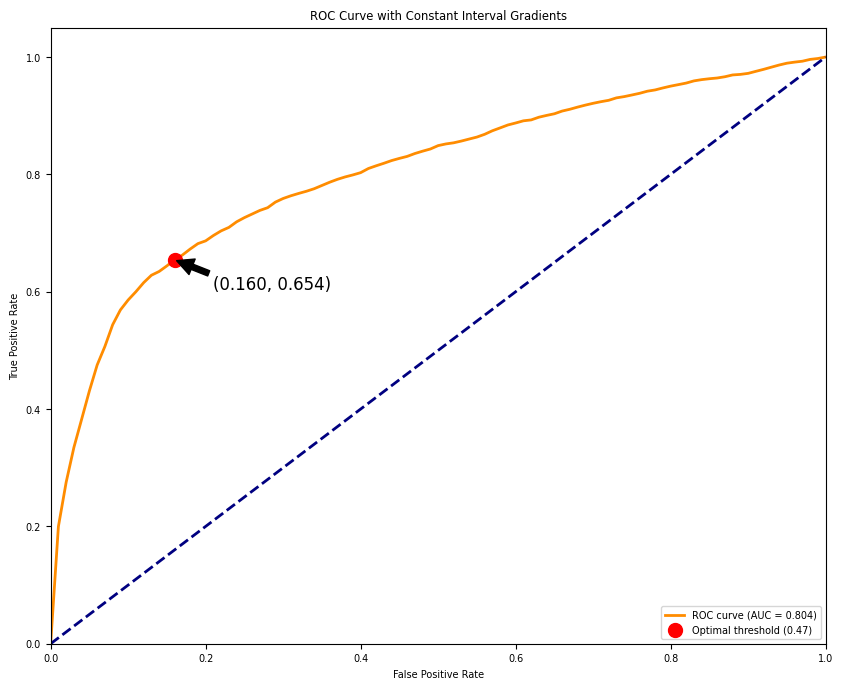

In [121]:
plot_roc_curve_with_optimal_threshold(
    gbm_result["tpr"], gbm_result["threshold"], optimal_threshold, gbm_result["auc"]
)


In [122]:
from sklearn.metrics import classification_report, confusion_matrix

In [123]:

k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=0)
for i, (train_idx, val_idx) in enumerate(kf.split(data, target)):

    # split the data
    _, y_val = target.iloc[train_idx], target.iloc[val_idx]

    # confusion matrix result
    y_pred = np.where(pred_probas[i] > optimal_threshold, 1, 0)
    print(f"Fold {i+1} Confusion Report:")
    confusion_result = confusion_matrix(y_val, pred_probas[i] >= optimal_threshold)
    true_negative = confusion_result[0,0]
    true_positive = confusion_result[1,1]
    false_positive = confusion_result[0,1]
    false_negative = confusion_result[1,0]
    print("False positive rate :", false_positive*100/(false_positive + true_negative), "%")
    print("True positive rate / Recall :", true_positive*100/(true_positive + false_negative), "%")
    print("Precision :", true_positive*100/(false_positive + true_positive), "%")
    print(confusion_result)
    print()

Fold 1 Confusion Report:
False positive rate : 15.45827633378933 %
True positive rate / Recall : 65.84615384615384 %
Precision : 35.11074651353569 %
[[4326  791]
 [ 222  428]]

Fold 2 Confusion Report:
False positive rate : 17.60797342192691 %
True positive rate / Recall : 69.49152542372882 %
Precision : 33.357988165680474 %
[[4216  901]
 [ 198  451]]

Fold 3 Confusion Report:
False positive rate : 15.810044948211843 %
True positive rate / Recall : 64.25269645608628 %
Precision : 34.01305057096248 %
[[4308  809]
 [ 232  417]]

Fold 4 Confusion Report:
False positive rate : 15.246286161063331 %
True positive rate / Recall : 64.3076923076923 %
Precision : 34.891485809682806 %
[[4336  780]
 [ 232  418]]

Fold 5 Confusion Report:
False positive rate : 15.63721657544957 %
True positive rate / Recall : 63.84615384615385 %
Precision : 34.15637860082305 %
[[4316  800]
 [ 235  415]]



In [124]:
list1 = list(transformer.transformers_[0][1].get_feature_names_out())
list2 = list(transformer.transformers_[1][1].get_feature_names_out())
list3 = list(transformer.transformers_[2][1].get_feature_names_out())
list4 = list(transformer.transformers_[3][1].get_feature_names_out())
features = list1+list2+list3+list4

In [125]:
X_test_transformed = pd.DataFrame(transformer.transform(X_test))
X_test_transformed.columns = features

### **7.1. Best Model**

In [126]:
best_model = pipe_model_gbm

<Axes: xlabel='imp', ylabel='index'>

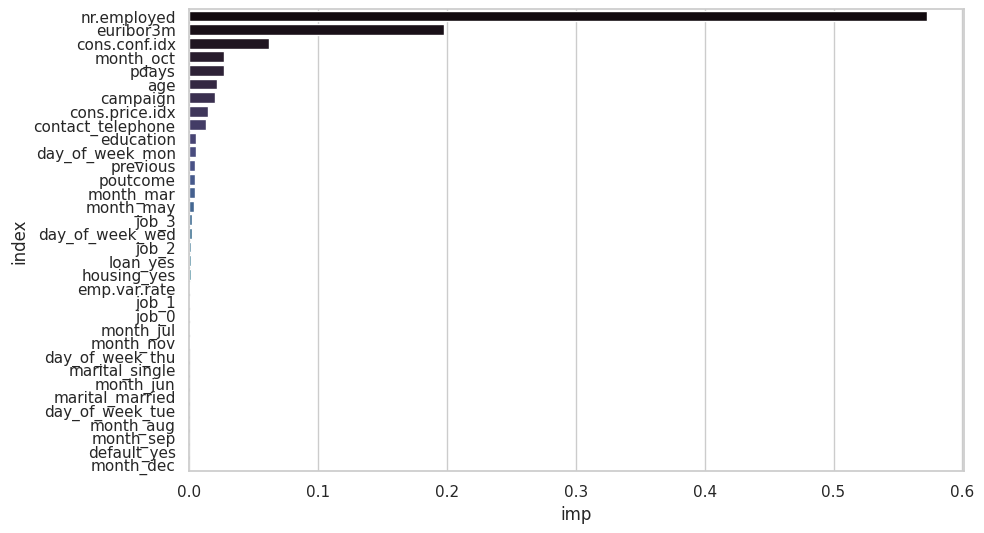

In [127]:
importance_table = pd.DataFrame(
    {'imp': best_model[2].feature_importances_, 'index': features}
).sort_values(by='imp', ascending=False)

#visualization
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
sns.barplot(data=importance_table,x="imp",y="index",orient="h",palette="mako")

### **7.2. Model Explanation**

We'll use SHAP to explain the model because it's a model-agnostic technique applicable to any machine learning algorithm.

SHAP (SHapley Additive exPlanations) is a game-theoretic approach that explains the output of machine learning models. It connects optimal credit allocation with local explanations using classic Shapley values from game theory and their extensions. [SHAP documentation](https://pypi.org/project/shap/)

**SHAP Values**

In [128]:
import shap
# Convert the model to a SHAP explainer
explainer_shap = shap.TreeExplainer(pipe_model_gbm[2])

# Calculate SHAP values for the test set
shap_values = explainer_shap(X_test_transformed)

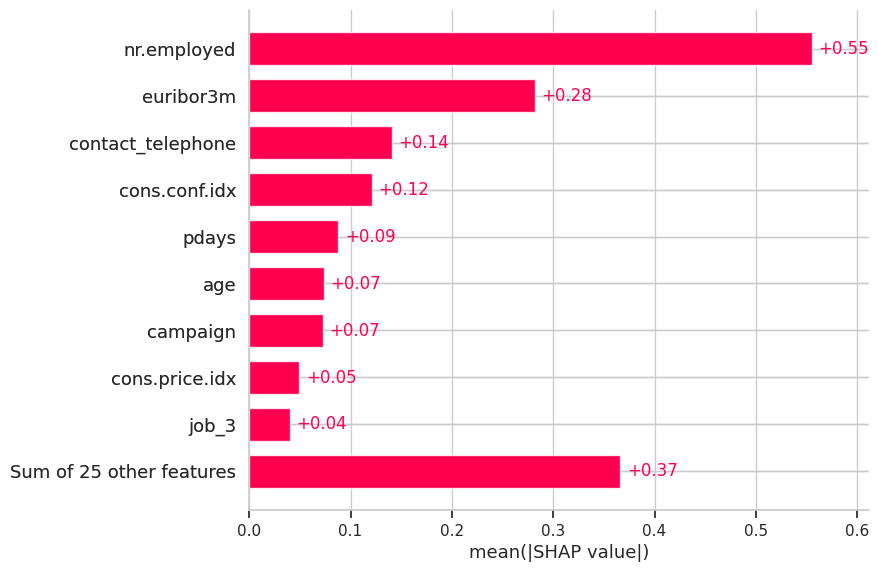

In [129]:
shap.plots.bar(shap_values,max_display=10)

The bar chart above indicates the average impact of the feature on the model's output. We see that the top 3 features of significant impact are :
- euribor 3 month rate 
- number of employees 
- contact_telephone (0 for cellular, 1 for telephone).

Let's take a look at the top 3 features and see how their values affect the model.

**Summary Plot**

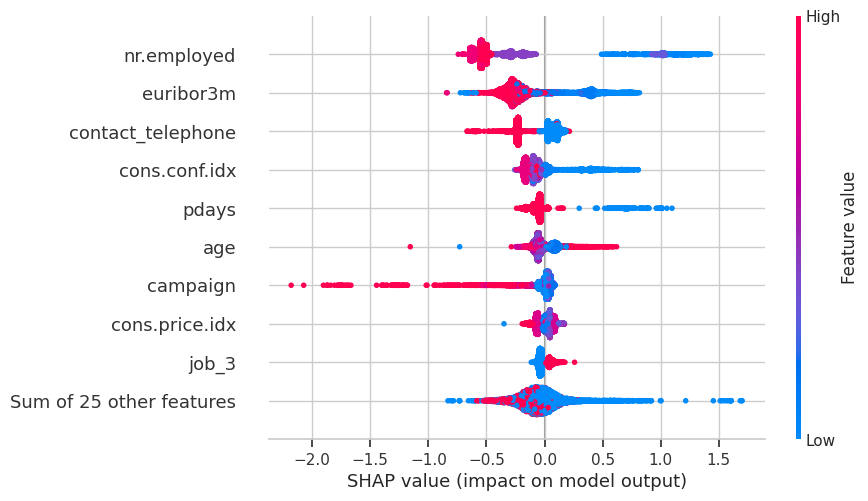

In [130]:
shap.plots.beeswarm(shap_values, max_display=10)

The beeswarm plot above indicates the distribution of all customers and how their characteristics affects the impact on model output (More to the right pushes the model to make positive decision (Accept deposit) and vice versa).

Note : Features with seperated colors are easier to interpret.

Based on the findings , significant positive impact were made when :
- euribor 3 month rate gets lower
- low number of employees
- contacted using cellular phones

---

##### **Local interpretability: explaining individual predictions**

In [131]:
# using first index for individual prediction
i = 0

print(f"Features:\n{X_test.iloc[i]}")
print(f"\nTarget:\n{y_test.iloc[i]}")

Features:
age                              57
job                      management
marital                    divorced
education         university.degree
default                          no
housing                         yes
loan                            yes
contact                    cellular
month                           nov
day_of_week                     thu
duration                        114
campaign                          2
pdays                           999
previous                          0
poutcome                nonexistent
emp.var.rate                   -0.1
cons.price.idx                 93.2
cons.conf.idx                 -42.0
euribor3m                     4.076
nr.employed                  5195.8
Name: 26771, dtype: object

Target:
0


**Bar Plot**

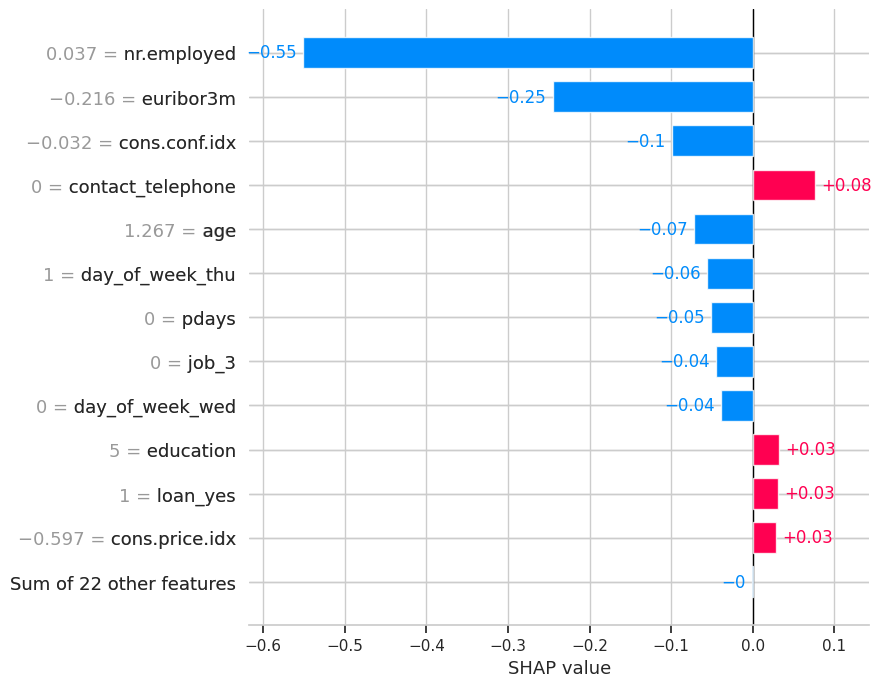

In [132]:
shap.plots.bar(shap_values[i], max_display=13)

## **8. Cost Benefit Analysis** 


#### **Business Metric**

In [133]:
best_model.fit(X_train, y_train)
y_pred_proba = best_model.predict_proba(X_test)


In [134]:
y_pred = np.where(y_pred_proba_gbm[:, 1] >= optimal_threshold, 1, 0)


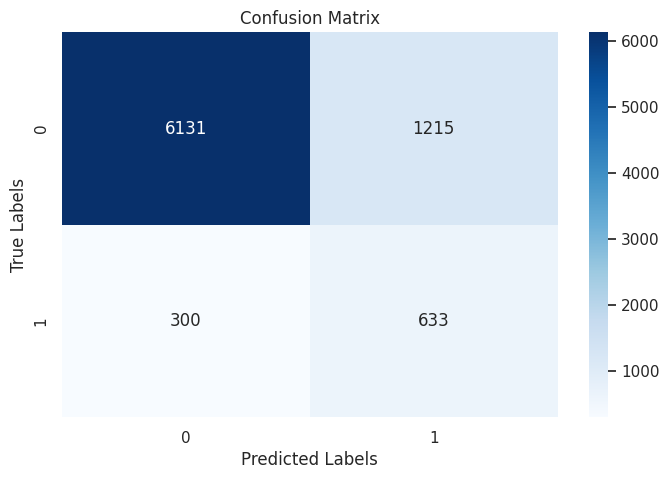

In [148]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

In [149]:
true_negative = cm[0, 0]
true_positive = cm[1, 1]
false_positive = cm[0, 1]
false_negative = cm[1, 0]
print(
    "False Positive Rate :",
    np.round(false_positive * 100 / (false_positive + true_negative), 2),
    "%",
)
print(
    "True Positive Rate / Recall :",
    np.round(true_positive * 100 / (true_positive + false_negative), 2),
    "%",
)
print(
    "Precision :",
    np.round(true_positive * 100 / (false_positive + true_positive), 2),
    "%",
)


False Positive Rate : 16.54 %
True Positive Rate / Recall : 67.85 %
Precision : 34.25 %


As we can see that our model when applied on the test have the value close to our previous value in the cross validation, and in our ROC curve model. this means that our model is reliable enough when applied to the test data.


#### **Business Assumptions**

The Assumption we make in this project is that this bussiness case and problem, and insight are intended when the bank try to campaign the deposit term to their current recorded client.

this assumption is important to consider because there is a need to retain the client to still become the bank's client even though they are not interested in the current campaign. that's why the bank cannot ravishly called every people in the list because there is a chance that the uninterested client become annoyed and churn from the bank.
the case will be different if the bank try to campaign the deposit term to the new client, as there is no such threat.

#### **Applying Calculations to Predictions**

Let's us see how our model are impacted the bank in terms of revenue, we will compare the result with non-ML case where company try to contact all the client in their list

In [137]:
y_test.value_counts()

y
0    7346
1     933
Name: count, dtype: int64

In [138]:
# define all the variable for revenue calculation
p = 933
n = 7346
tp = 633
fp = 300

In [139]:
# this should be deleted later because it's already in the utils.py
def calculate_revenue(tp, fp, p, n):
    call_cost = 7
    tp_income = 1000 - call_cost
    fp_loss = 120 + call_cost

    # with ml
    actual_revenue_ml = tp * tp_income - fp * fp_loss
    actual_revenue_non_ml = p * tp_income - n * fp_loss
    print("Net Revenue with ML : €", np.round(actual_revenue_ml))
    print("Net Revenue without ML : €", np.round(actual_revenue_non_ml))
    print(
        "Revenue Difference by Using ML : €",
        np.round(actual_revenue_ml - actual_revenue_non_ml),
    )


In [140]:
calculate_revenue(tp=633, fp=300, p=933, n=7346)

Net Revenue with ML : € 590469
Net Revenue without ML : € -6473
Revenue Difference by Using ML : € 596942


As we can see that by calling all the income due to getting the customers are outweight by the loss the company got due to customer annoyance, so The method to call as much as possible customer is not a good way to approach the customer.

On the other hand, The ML ensures that the bank get the deposit as much as possible by calling the one who considered interested, even though the model still get many false positives, but the income from the deposit outweight the cost. so that it still capable of getting the maximum revenue as possible.

## **9. Conclusion & Recommendation**


### **8.1. Conclusion and Key Findings**

### **8.2. Recommendation**

#### **Save Model**

In [141]:
import pickle

best_model.fit(X_train, y_train)
pickle.dump(best_model, open('models/best_model.pkl', 'wb'))

#### **Export Data for Dashboard**

**Split data into Control and Treatment groups**

In [166]:
# Split the X_test and y_test into two equal parts for treatment and control groups
X_test_treatment, X_test_control, y_test_treatment, y_test_control = train_test_split(
    X_test, y_test, stratify=y_test, test_size=0.5, random_state=0
)

# Fit the model to the training data
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('nominal',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['marital', 'default',
                                                   'housing', 'contact', 'loan',
                                                   'month', 'day_of_week']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'university.degree',
                                                                              'professional.course'],
                                                                             ['nonexistent',
                                                                              'failure',
                                                                              'success']]),
                                                  ['education', 'poutcome']),
                                                 ('normalize', RobustScaler(),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('resampling', RandomOverSampler(random_state=0)),
                ('model',
                 GradientBoostingClassifier(random_state=0, verbose=False))])

**Generate Control and Treatment Set**

In [175]:
# Predict probabilities for the treatment set
y_pred_proba_best_model = best_model.predict_proba(X_test_treatment)
# Extract the probability of the positive class (e.g., deposit)
treatment_proba = y_pred_proba_best_model[:, 1]

# Generate random predictions (as a control) for the control group
np.random.seed(1)
random_guess = np.random.random((X_test_control.shape[0], 1))
random_boolean = np.where(random_guess > 0.50, 1, 0)  # Convert to binary predictions
np.mean(random_boolean)

0.505072463768116

In [168]:
# Create a dataframe for the treatment group and add relevant columns
dashboard_label_treatment = X_test_treatment.copy()
dashboard_label_treatment["Deposit"] = y_test_treatment
dashboard_label_treatment["Predict Proba"] = treatment_proba
dashboard_label_treatment

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit,Predict Proba
8412,53,services,married,high.school,no,no,no,telephone,jun,tue,76,8,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0,0.254057
36391,32,admin.,married,university.degree,no,no,no,cellular,jun,tue,74,1,4,1,success,-2.9,92.963,-40.8,1.262,5076.2,1,0.945510
15993,42,admin.,single,university.degree,no,no,no,cellular,jul,tue,125,4,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0,0.378557
29214,34,blue-collar,married,professional.course,no,no,no,cellular,apr,fri,365,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,0.576053
13711,31,admin.,married,high.school,no,no,no,cellular,jul,thu,363,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0,0.380447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33579,33,management,married,basic.9y,no,yes,no,cellular,may,tue,275,3,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,0,0.396209
15028,49,services,single,high.school,no,yes,yes,cellular,jul,thu,205,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0,0.353739
14047,42,management,divorced,university.degree,no,yes,no,cellular,jul,fri,215,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0,0.342956
4484,58,management,married,basic.4y,no,no,no,telephone,may,tue,325,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0,0.192089


In [1]:
# Create a dataframe for the control group and add relevant columns
dashboard_label_control = X_test_control.copy()
dashboard_label_control["Deposit"] = y_test_control
dashboard_label_control["Proba guess"] = random_guess
dashboard_label_control

NameError: name 'X_test_control' is not defined

**Generate the Unseen Set (No Labels)**

In [170]:
# For the dashboard, generate predictions on an unseen dataset (X_test_dash)
y_pred_proba_best_model_dash = best_model.predict_proba(X_test_dash)
dash_proba = y_pred_proba_best_model_dash[:, 1]

# Generate random predictions for the unseen dashboard data
np.random.seed(3)
random_guess_dash = np.random.random((X_test_dash.shape[0], 1))
random_boolean_dash = np.where(random_guess_dash > 0.50, 1, 0)
np.mean(random_boolean_dash)


0.4977930358018637

In [171]:
# Create a dataframe for the dashboard data without labels
dashboard_df_no_label = X_test_dash.copy()
dashboard_df_no_label["Predict Proba"] = dash_proba
dashboard_df_no_label["Predict Proba RandGuess"] = random_guess_dash
dashboard_df_no_label

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Predict Proba,Predict Proba RandGuess
33436,35,admin.,single,university.degree,no,yes,no,cellular,may,tue,536,1,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,0.313573,0.550798
30848,32,management,divorced,university.degree,no,yes,no,cellular,may,tue,313,1,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,0.445257,0.708148
30567,30,technician,single,professional.course,no,no,no,cellular,may,mon,79,4,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0.517439,0.290905
11270,59,retired,married,basic.9y,no,yes,no,telephone,jun,thu,235,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0.294274,0.510828
18499,53,blue-collar,married,basic.4y,no,no,yes,cellular,jul,thu,36,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0.286927,0.892947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23113,54,admin.,married,university.degree,no,no,no,cellular,aug,tue,119,3,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0.295172,0.160129
32261,35,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,318,2,11,1,success,-1.8,92.893,-46.2,1.313,5099.1,0.746888,0.463697
34440,27,admin.,single,basic.9y,no,yes,no,telephone,may,thu,230,4,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,0.302815,0.166451
3658,59,blue-collar,married,basic.4y,no,no,no,telephone,may,fri,424,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0.237585,0.257817


**Save dataset**

In [172]:
# Reset the index for all dataframes before saving
dashboard_label_treatment = dashboard_label_treatment.reset_index(drop=True)
dashboard_label_control = dashboard_label_control.reset_index(drop=True)
dashboard_df_no_label = dashboard_df_no_label.reset_index(drop=True)

In [174]:
# Save the dataframes to CSV files
dashboard_label_treatment.to_csv(
    "dataset/dashboard/df_label_treatment.csv", index=False
)
dashboard_label_control.to_csv("dataset/dashboard/df_label_control.csv", index=False)
dashboard_df_no_label.to_csv("dataset/dashboard/df_no_label.csv", index=False)
